<a href="https://colab.research.google.com/github/TheoFarhat/CariocaExperience/blob/main/Real_Estate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória - Brasil Real Estate Data**





Neste projeto, irei fazer uma análise dos dados de imóveis nas cidades brasileiras.







###**Importando as bibliotecas**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Importando a base de dados**

In [ ]:
real_estate = pd.read_csv("/content/drive/MyDrive/houses_to_rent_v2.csv")

real_estate

city  area  rooms  bathroom  parking spaces floor     animal  \
0           São Paulo    70      2         1               1     7      acept   
1           São Paulo   320      4         4               0    20      acept   
2        Porto Alegre    80      1         1               1     6      acept   
3        Porto Alegre    51      2         1               0     2      acept   
4           São Paulo    25      1         1               0     1  not acept   
...               ...   ...    ...       ...             ...   ...        ...   
10687    Porto Alegre    63      2         1               1     5  not acept   
10688       São Paulo   285      4         4               4    17      acept   
10689  Rio de Janeiro    70      3         3               0     8  not acept   
10690  Rio de Janeiro   120      2         2               2     8      acept   
10691       São Paulo    80      2         1               0     -      acept   

           furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0          furnished      2065              3300                211   
1      not furnished      1200              4960               1750   
2      not furnished      1000              2800                  0   
3      not furnished       270              1112                 22   
4      not furnished         0               800                 25   
...              ...       ...               ...                ...   
10687      furnished       402              1478                 24   
10688  not furnished      3100             15000                973   
10689      furnished       980              6000                332   
10690      furnished      1585             12000                279   
10691  not furnished         0              1400                165   

       fire insurance (R$)  total (R$)  
0                       42        5618  
1                       63        7973  
2                       41        3841  
3                       17        1421  
4                       11         836  
...                    ...         ...  
10687                   22        1926  
10688                  191       19260  
10689                   78        7390  
10690                  155       14020  
10691                   22        1587  

[10692 rows x 13 columns]

Visualizando as colunas da base de dados

In [ ]:
real_estate.columns.values

array(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype=object)

Queremos criar uma lista de features com as colunas que nos trazem informações sobre o preço do imóvel. Posteriormente, também será criado a lista contendo o nosso target, que é o preço em sí.

Percebe-se que as features com melhores informações são as de cidade do imóvel, quantidade de quartos, se está mobíliado, andar, quantidade de vagas de garagem, quantidade de banheiros e tamanho do imóvel.

As outras informações muito provavelmente não trazem informações pertinentes para o nosso dataset, então não serão utilizadas. Posteriormente, será feito uma matriz de correalação para comprovar a relação entre as variáveis.


In [ ]:
features = ["city",	"area",	"rooms", "bathroom",	"parking spaces",	"floor", "furniture", "rent amount (R$)"]


### **Dados**

Criaremos um dataset com essas features, onde posteriormente será feito o treinamento para prever o valor dos imóveis.

In [ ]:
real_estate_train = real_estate[features]


Agora visualizaremos o dataset novamente.

In [ ]:
real_estate_train.columns.values

array(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'furniture', 'rent amount (R$)'], dtype=object)

Dessa forma, temos um dataset apenas com as features que queremos.

### **Análise preliminar dos dados**

Verificaremos a dimensão do nosso dataset.

In [ ]:
real_estate_train.shape


(10692, 8)

Ou seja, temos 12833 informações sobre imóveis, com 5 colunas (nossas features e target).

Algumas informações sobre a base de dados.


In [ ]:
print(real_estate_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              10692 non-null  object
 1   area              10692 non-null  int64 
 2   rooms             10692 non-null  int64 
 3   bathroom          10692 non-null  int64 
 4   parking spaces    10692 non-null  int64 
 5   floor             10692 non-null  object
 6   furniture         10692 non-null  object
 7   rent amount (R$)  10692 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 668.4+ KB
None


In [ ]:
real_estate.head(50)

city  area  rooms  bathroom  parking spaces floor     animal  \
0        São Paulo    70      2         1               1     7      acept   
1        São Paulo   320      4         4               0    20      acept   
2     Porto Alegre    80      1         1               1     6      acept   
3     Porto Alegre    51      2         1               0     2      acept   
4        São Paulo    25      1         1               0     1  not acept   
5        São Paulo   376      3         3               7     -      acept   
6   Rio de Janeiro    72      2         1               0     7      acept   
7        São Paulo   213      4         4               4     4      acept   
8        São Paulo   152      2         2               1     3      acept   
9   Rio de Janeiro    35      1         1               0     2      acept   
10       São Paulo    26      1         1               0     2      acept   
11        Campinas    46      1         1               1    10      acept   
12       São Paulo    36      1         1               0    11      acept   
13       São Paulo    55      1         1               1     2      acept   
14       São Paulo   100      2         2               2    24      acept   
15        Campinas   330      4         6               6     -      acept   
16       São Paulo   110      2         2               1     1      acept   
17  Rio de Janeiro    88      2         3               1     9  not acept   
18  Rio de Janeiro    56      2         1               0     8      acept   
19       São Paulo   600      4         5               6     -      acept   
20       São Paulo   100      7         4               0     -      acept   
21  Belo Horizonte    42      1         1               1    17  not acept   
22       São Paulo   160      3         2               2    18      acept   
23       São Paulo    35      1         1               0     -      acept   
24  Rio de Janeiro    90      3         2               1     7      acept   
25       São Paulo    49      1         1               1    10      acept   
26       São Paulo    41      1         1               1     5  not acept   
27  Belo Horizonte    64      2         2               1    11      acept   
28        Campinas   208      3         2               4     -      acept   
29       São Paulo    20      1         1               0     5      acept   
30       São Paulo    55      2         2               2     6      acept   
31       São Paulo    32      1         1               0     3      acept   
32       São Paulo    80      2         2               1    11      acept   
33  Rio de Janeiro    45      1         1               1    10      acept   
34       São Paulo   350      4         4               3     8      acept   
35    Porto Alegre    38      1         1               2    11  not acept   
36       São Paulo    30      1         1               0     1      acept   
37  Belo Horizonte    80      3         2               1     -      acept   
38       São Paulo    70      2         1               0     -  not acept   
39    Porto Alegre    40      1         1               1     6      acept   
40       São Paulo   300      4         6               4    20      acept   
41       São Paulo   240      3         2               3     -      acept   
42  Belo Horizonte   200      4         2               1     7  not acept   
43  Belo Horizonte    45      1         1               1     5      acept   
44       São Paulo   360      4         5               0     1      acept   
45       São Paulo    40      1         1               1    10      acept   
46  Belo Horizonte   100      3         1               0    13  not acept   
47    Porto Alegre    42      1         1               2     2      acept   
48        Campinas   250      3         3               2     1      acept   
49        Campinas    48      1         1               1     2      acept   

        furniture  hoa (R$)  rent a

Pode-se perceber que não temos valores faltantes do tipo "NAN" porém o dataset está com valores faltantes do tipo "-", dando a falsa impressão de que há valores inseridos. Assim, faremos um pequeno tratamento para tirar esses valores "-".

In [ ]:
real_estate_train['floor'] = real_estate_train['floor'].apply(lambda x: 0 if not x.isnumeric() else int(x))


<ipython-input-15-90715388dd07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_train['floor'] = real_estate_train['floor'].apply(lambda x: 0 if not x.isnumeric() else int(x))


Como não temos valores do tipo "NAN", não precisará ser feito nenhum outro tratamento.

Caso houvesse valores faltantes, poderiamos seguir diversos caminhos. O primeiro caminho seria o de deletar as linhas contendo valores faltantes. A segunda alternativa seria fazer o processo de inputação. Perceba que o processo de inputação há algumas alternativas que são:


*   Substituir os valores NAN's pela média;
*   Substituir os valores NAN's por uma constante;
*   Substituir os valores NAN's pela moda;
*   Substituir os valores NAN's pela mediana;



Nesse trabalho, não precisará fazer a inputação.


# **Análise dos Dados**

As variáveis dos nossos imóveis são:

1. **city** (cidade da propriedade);

2. **area** (tamanho em métros quadrados);

3. **parking spaces** (quantidade de vagas de garagem);

4. **rooms** (quantidade de quartos);

5. **bathroom** (quantidade de banheiros);

6. **furniture** (se está mobiliado);

7. **floor** (andar do apartamento);

8. **rent amount (R$)** (valor do aluguel do imóvel)

Vejamos como nosso dataset está distribuido por cidades.



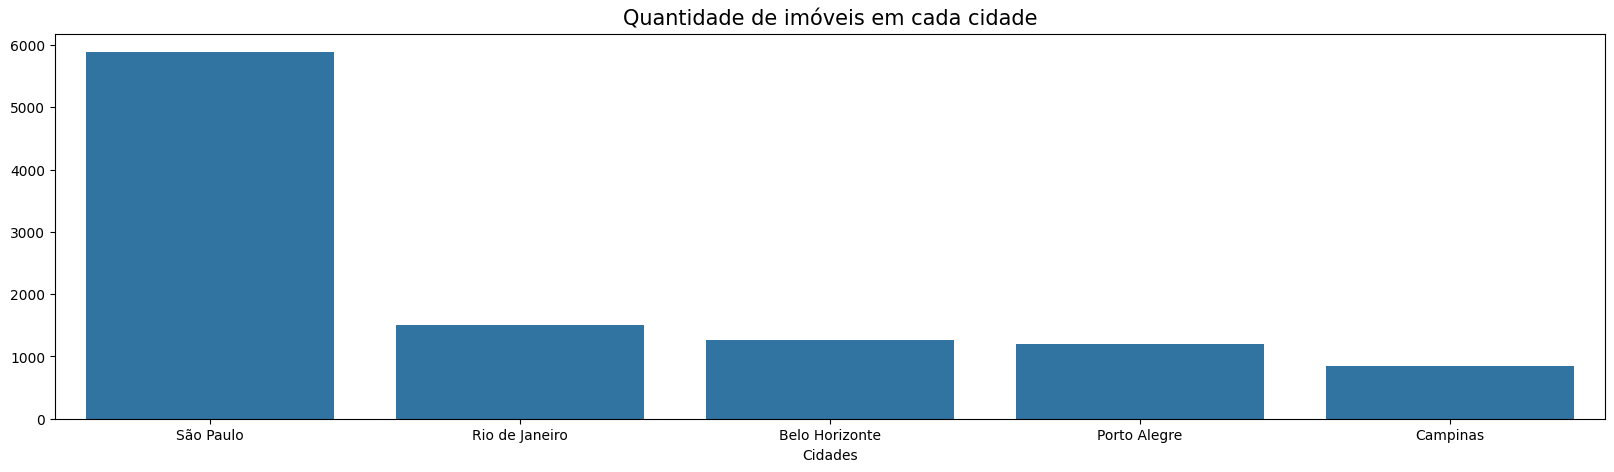

In [ ]:

plt.figure(figsize=(20, 5))
sns.countplot(x='city', data=real_estate_train, order=real_estate_train['city'].value_counts().index)

plt.ylabel('')
plt.xlabel("Cidades", size=10)
plt.title("Quantidade de imóveis em cada cidade", size=15)
plt.show()


Média dos valores dos imóveis por cidade.

<ipython-input-12-bc3e9e466234>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='rent amount (R$)', data=media_por_estado, palette=palette)


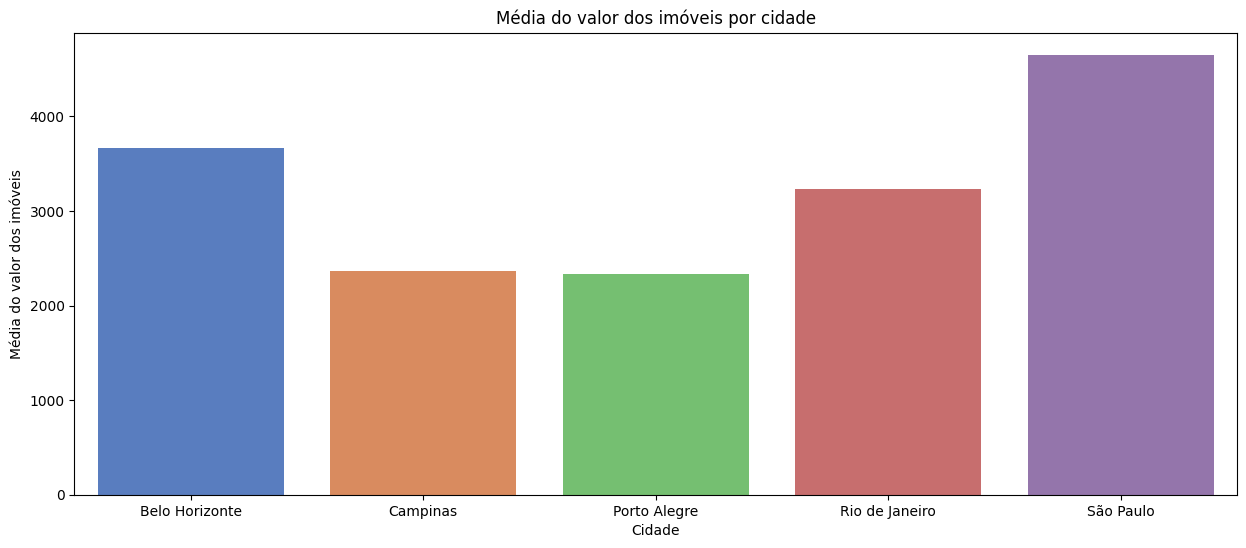

In [ ]:

media_por_estado = real_estate_train.groupby('city')['rent amount (R$)'].mean().reset_index()


palette = sns.color_palette('muted', n_colors=len(media_por_estado))

plt.figure(figsize=(15, 6))
sns.barplot(x='city', y='rent amount (R$)', data=media_por_estado, palette=palette)
plt.xlabel('Cidade')
plt.ylabel('Média do valor dos imóveis')
plt.title('Média do valor dos imóveis por cidade')
plt.show()


Podemos fazer uma curva de valores dos imóveis nas cidades.

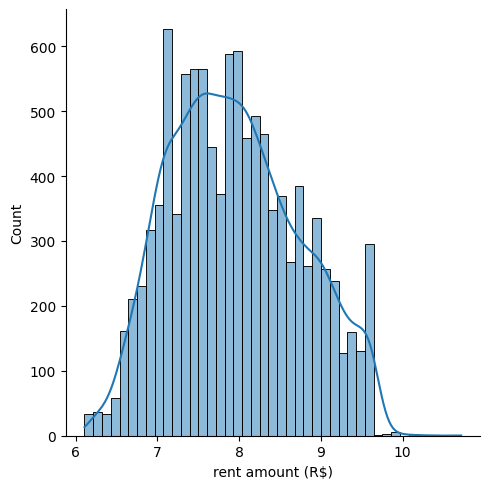

<Figure size 2000x600 with 0 Axes>

In [ ]:

analysis_data = pd.DataFrame(columns=["city", "area", "rooms", "bathroom", "parking spaces", "floor", "furniture", "rent amount (R$)"])
analysis_data['rent amount (R$)'] = np.log(real_estate_train['rent amount (R$)'])

sns.displot(analysis_data['rent amount (R$)'], kde=True)
plt.figure(figsize=(20, 6))

plt.show()


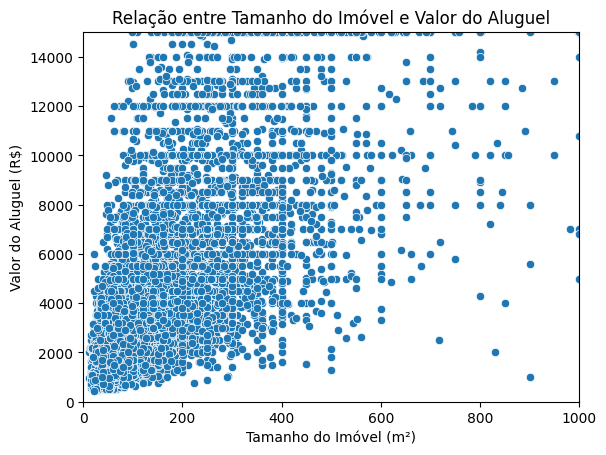

In [ ]:

sns.scatterplot(x='area', y='rent amount (R$)', data=real_estate_train)
plt.title('Relação entre Tamanho do Imóvel e Valor do Aluguel')
plt.xlabel('Tamanho do Imóvel (m²)')
plt.ylabel('Valor do Aluguel (R$)')


plt.xlim(0, 1000)
plt.ylim(0, 15000)

plt.show()



Compararando a distribuição do valor do aluguel para imóveis mobiliados e não mobiliados.

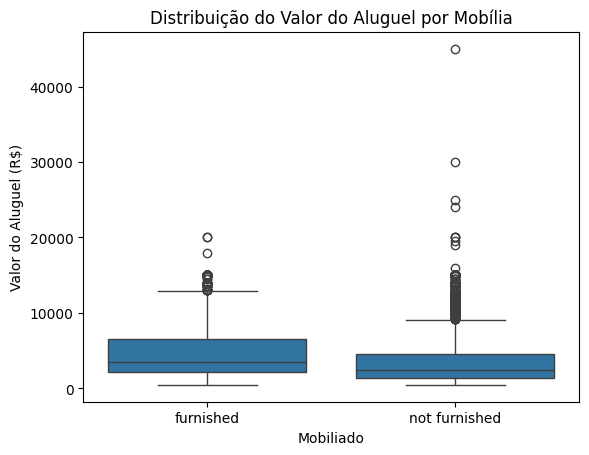

In [ ]:
sns.boxplot(x='furniture', y='rent amount (R$)', data=real_estate_train)
plt.title('Distribuição do Valor do Aluguel por Mobília')
plt.xlabel('Mobiliado')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()


## **Conclusão**

Pode-se concluir que os maiores valores de imóveis estão concentrados em São Paulo.

Podemos perceber que a grande maioria dos imóveis tem aluguel na casa dos 5000-6000 reais com em média 100 m^2.

Também pode-se concluir que os imóveis não-mobiliados apresentam valores maiores de aluguél do que os mobiliados.  

# **Machine Learning**

Agora faremos a predição do valores dos imóveis de acordo sua região e estado.

Escolheremos, para nosso **Modelo de Regressão**, os seguintes parâmetros.

* **Features**: Tamanho da propriedade, Localização (Estado e Região) e tipo da propriedade (casa ou apartamento).

* **Target**: Preço em reais da propriedade.

## **Pré-processamento dos Dados**

Aqui faremos o tratamento e processamento dos dados para o nosso modelo regressor.



### **Importanto Bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

Vamos importar novamente nossa base de dados e fazer as devidas separações de features e target.

In [ ]:
real_estate = pd.read_csv("/content/drive/MyDrive/houses_to_rent_v2.csv")


real_estate['floor'] = real_estate['floor'].apply(lambda x: 0 if not x.isnumeric() else int(x))





real_estate.head()


city  area  rooms  bathroom  parking spaces  floor     animal  \
0     São Paulo    70      2         1               1      7      acept   
1     São Paulo   320      4         4               0     20      acept   
2  Porto Alegre    80      1         1               1      6      acept   
3  Porto Alegre    51      2         1               0      2      acept   
4     São Paulo    25      1         1               0      1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841  
3                   17        1421  
4                   11         836

Agora, mostraremos a correlação entre as features e o nosso target.

<ipython-input-18-41eea41f22f2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = real_estate_dummies.corr()


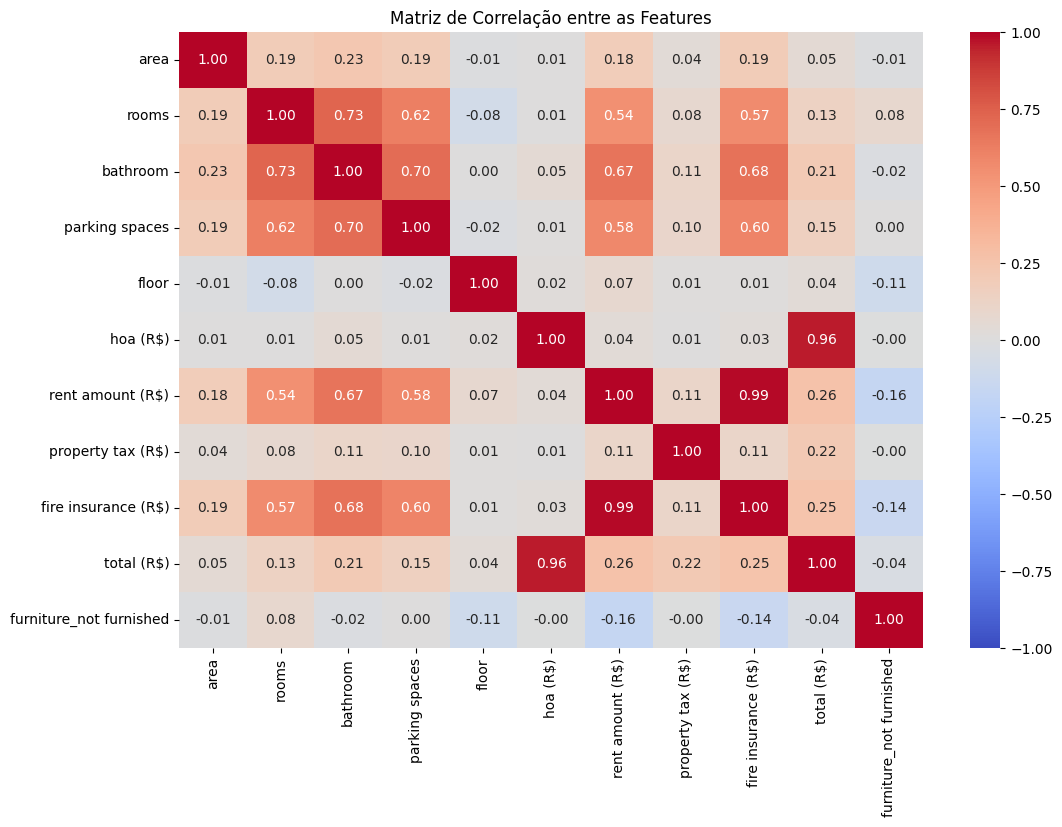

In [ ]:


categorical_features =["furniture"]
real_estate_dummies = pd.get_dummies(real_estate, columns=categorical_features, drop_first=True)

correlacao = real_estate_dummies.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre as Features')
plt.show()



Como pode-se perceber, de fato as as variáveis que tem mais correlação com o preço do aluguel são as de quantidade de quarto, quantidade de banheiros, quantidade de vagas de estacionamento e área.

Dessa maneira, criaremos um dataset de treino com essas features.

In [ ]:
features = ["parking spaces", "bathroom", "rooms", "area"]
target = ["rent amount (R$)"]

X = real_estate[features]
y = real_estate[target]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

y_test = y_test.values.ravel()
y_train = y_train.values.ravel()


Separamos a base em 85% treino e 15% teste.

Agora mostraremos as dimensões de cada uma.

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9088, 4) (1604, 4) (9088,) (1604,)


## **Aplicando modelos de Machine Learning/Deep Learning**

## ***Regressão Linear***

Começaremos pelo algoritmo mais famoso e introdutório.

Em todos os modelos, iremos praticar o método de Grid-Search para encontrar os melhores hiperparametros do modelo. O método de Cross Validation também será utilizado.

Também será feito Pipelines de forma a deixar o código mais simplificado.

In [ ]:

model = LinearRegression()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__fit_intercept': [True, False],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__fit_intercept': False}
Melhor Média do MAE: 1700.5126889442022


Agora iremos fazer a predição com nossa base de teste.

In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()


Fazendo agora o comparativo entre os valores reais e os valores preditos.

Usaremos 150 valores no nosso gráfico.

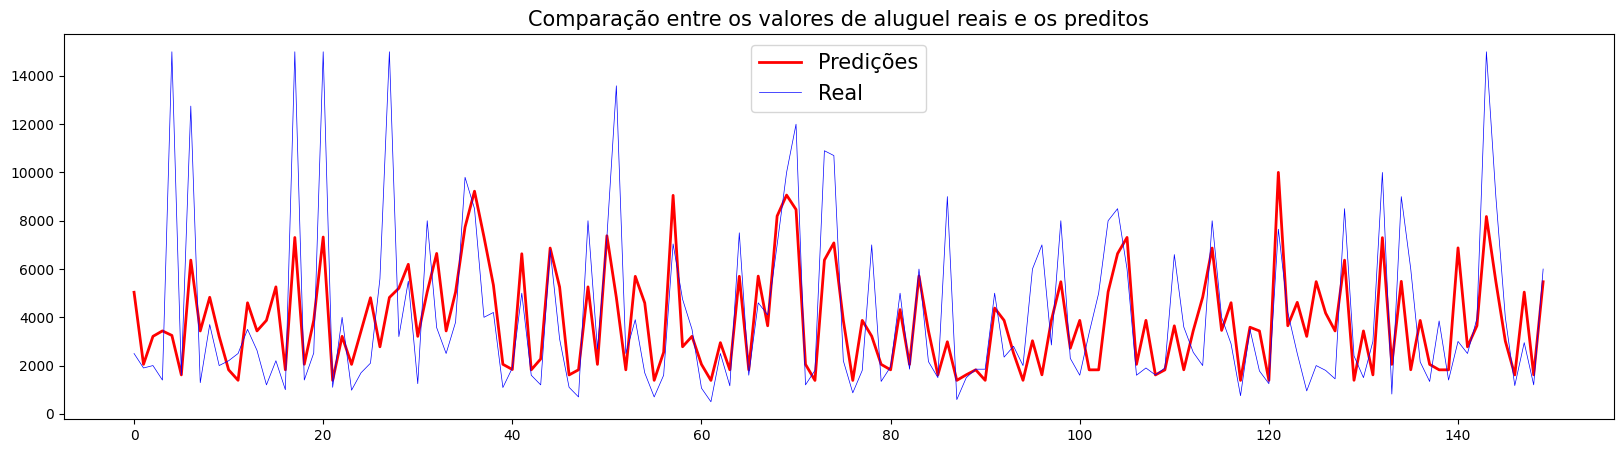

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

Outro gráfico mostrando os erros de predição da Regressão Linear.

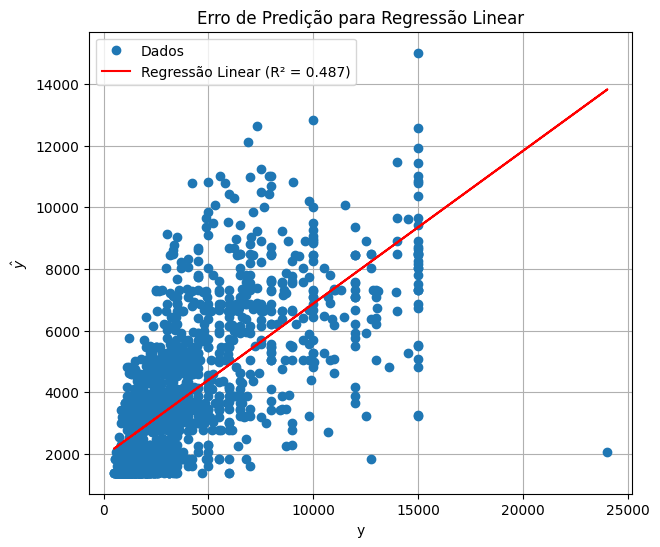

In [ ]:

m, b = np.polyfit(y_test, y_pred, 1)

# Plotagem dos dados e da linha de regressão
plt.figure(figsize=(7, 6))
plt.plot(y_test, y_pred, 'o', label='Dados')
plt.plot(y_test, b + m * y_test, color='r', label=f'Regressão Linear (R² = {np.corrcoef(y_test, y_pred)[0,1]**2:.3f})')
plt.title('Erro de Predição para Regressão Linear')
plt.xlabel("y")
plt.ylabel('$\hat{y}$')
plt.grid()
plt.legend()
plt.show()


##### **Métricas do modelo de Regressão Linear**







In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1618.384073291623
O erro médio quadrado é : 5587216.8747356
O erro mediano absoluto é : 1063.7429817595557
O R quadrado é : 0.4871318922166843
O erro médio absoluto é : 2363.729441948803


## ***Regressão Árvore de Decisão***

Instanciando modelo.

In [ ]:

model = DecisionTreeRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
  'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': [1.0, 'sqrt'],
    'model__criterion': ['squared_error', 'absolute_error']
}


grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Melhor Média do MAE: 1582.7261463818368


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

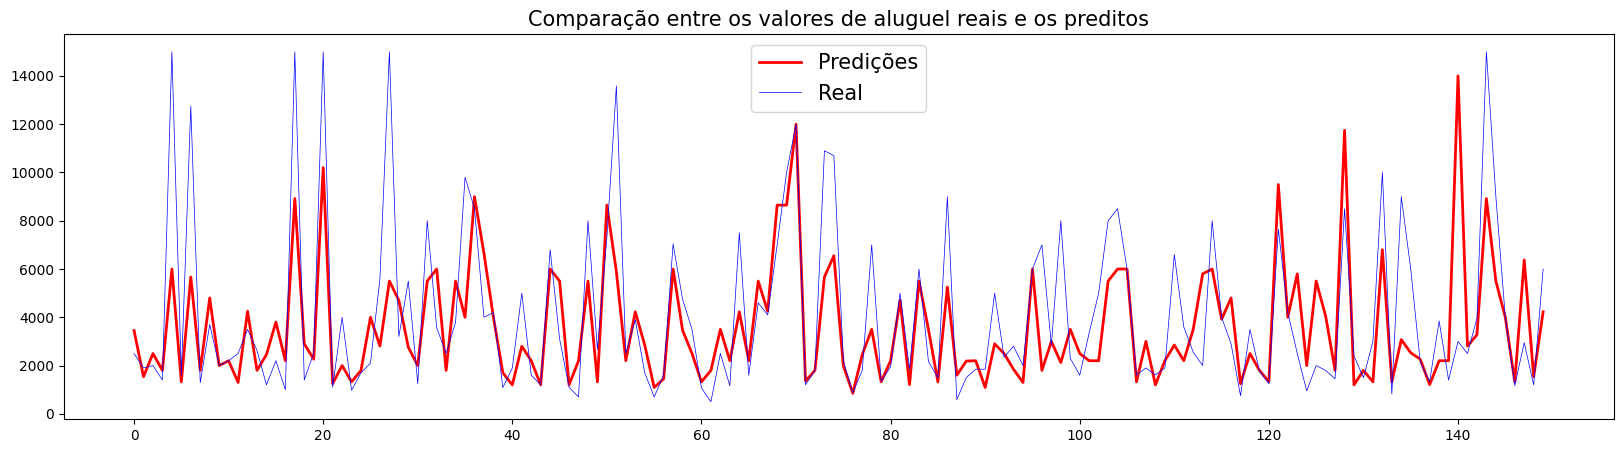

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-29-5c25691c7538>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


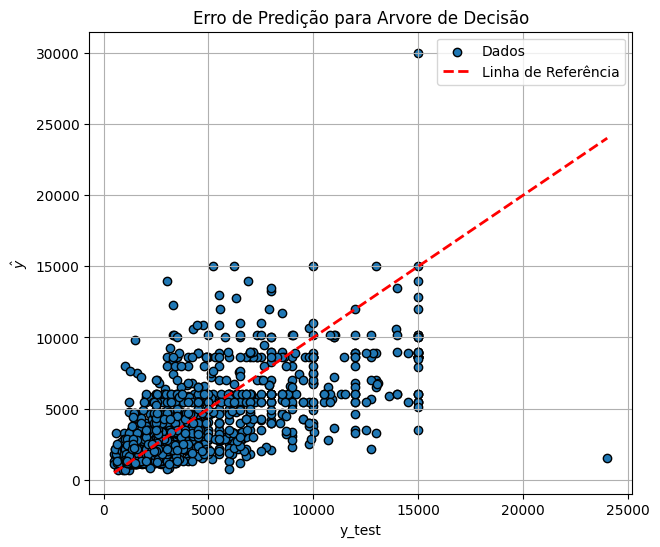

In [ ]:

y_pred_tree = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_tree, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição para Arvore de Decisão')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$')
plt.grid()
plt.legend()
plt.show()


#### **Métricas do modelo de Arvore de Decisão**



In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1526.8871571072318
O erro médio quadrado é : 5981934.008728179
O erro mediano absoluto é : 810.0
O R quadrado é : 0.4508995722335787
O erro médio absoluto é : 2445.799257651408


## ***Regressão SVM***

Instanciando modelo.

In [ ]:

model = svm.SVR()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__C': [0.1, 1],
    'model__epsilon': [0.1],
    'model__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__C': 1, 'model__epsilon': 0.1, 'model__kernel': 'linear'}
Melhor Média do MAE: 1630.3897144132618


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

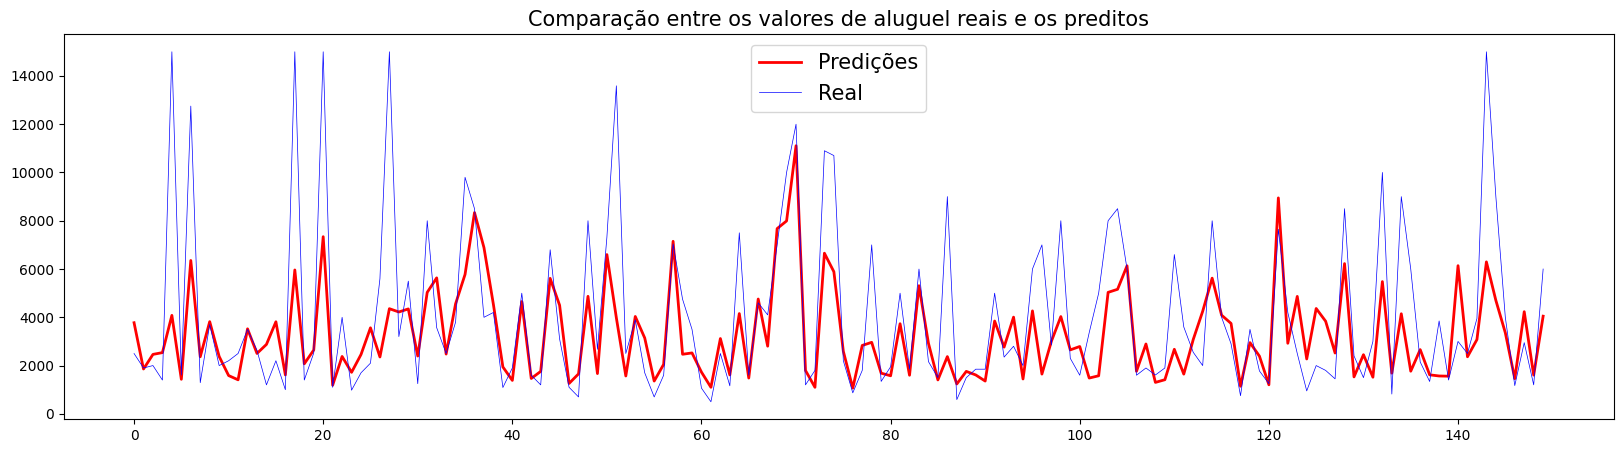

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-34-c9297ebf817a>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


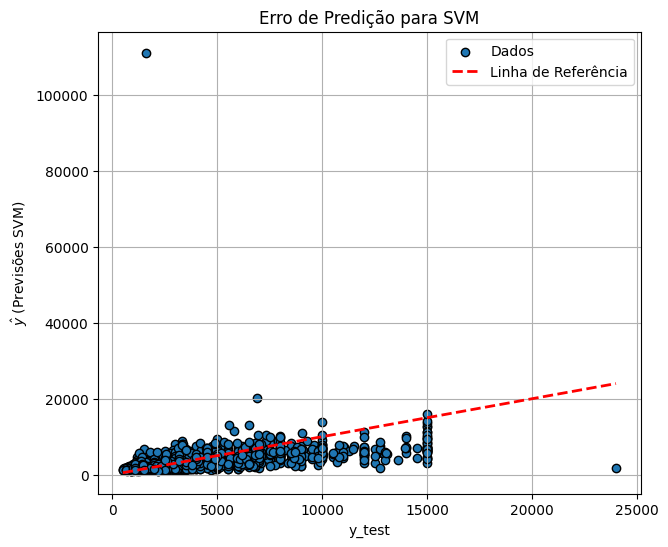

In [ ]:
y_pred_svm = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_svm, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição para SVM')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões SVM)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo SVM**

In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1560.2262450515495
O erro médio quadrado é : 13237188.989070877
O erro mediano absoluto é : 833.64528454308
O R quadrado é : -0.21508296910636582
O erro médio absoluto é : 3638.294791392099


## ***Regressão Bagging***

Instanciando o modelo.

In [ ]:

model = BaggingRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__max_samples': [0.5, 0.7, 0.9],
    'model__max_features': [0.5, 0.7, 0.9],
}
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__max_features': 0.9, 'model__max_samples': 0.5, 'model__n_estimators': 100}
Melhor Média do MAE: 1578.7469437096552


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

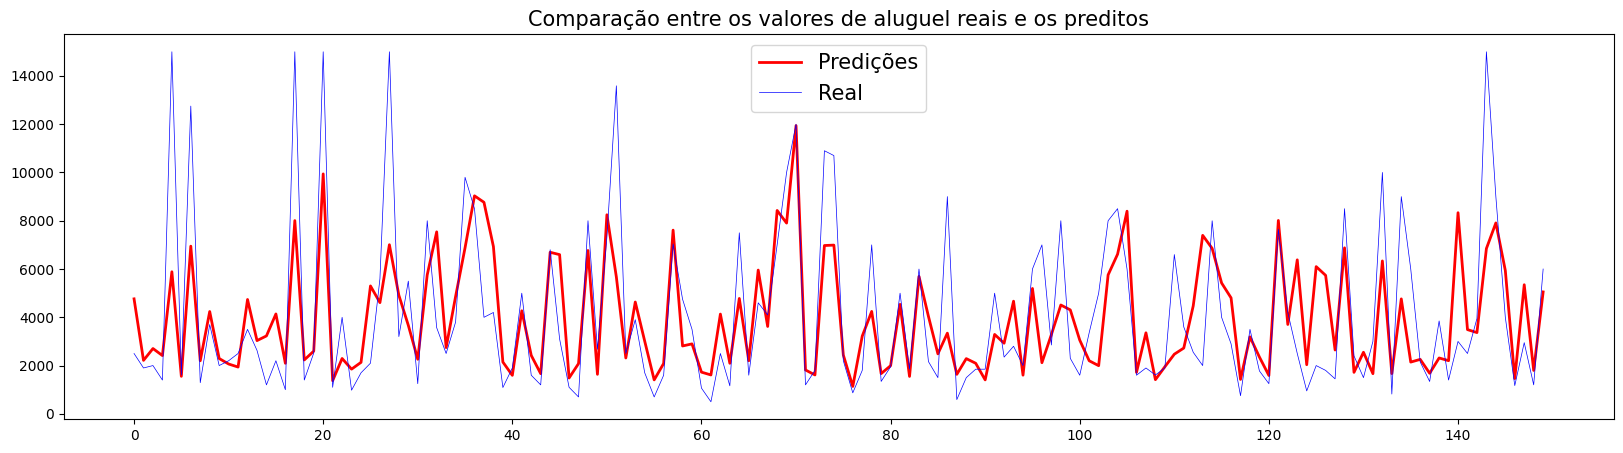

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-39-e4ab2e56bd22>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


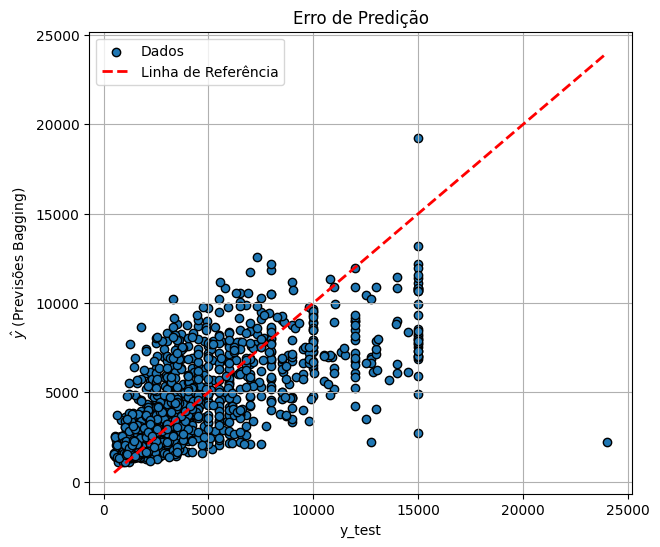

In [ ]:
y_pred_bagging = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_bagging, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Bagging)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo Bagging**

In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1496.4420846371106
O erro médio quadrado é : 5083852.416108206
O erro mediano absoluto é : 874.6007464531419
O R quadrado é : 0.5333372898608953
O erro médio absoluto é : 2254.7399885814343


## ***Regressão Lasso***

Instanciando modelo.

In [ ]:

model = Lasso()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
   'model__alpha': [0.1, 0.01, 0.001, 0.0001],
}
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__alpha': 0.0001}
Melhor Média do MAE: 1706.3207194637537


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

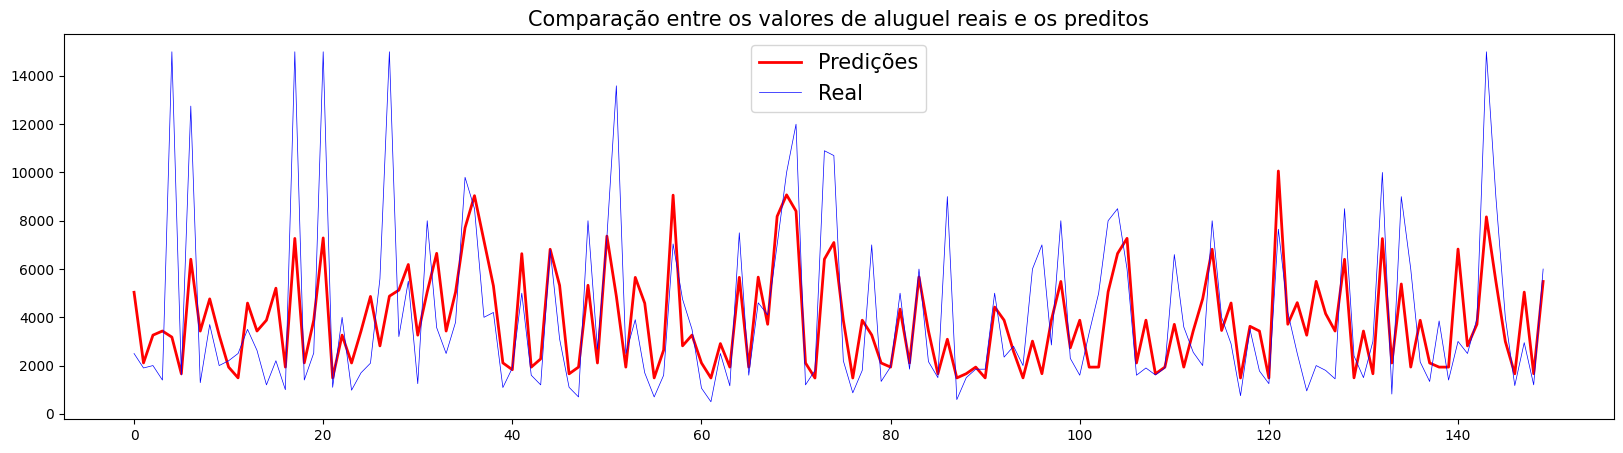

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-44-99d671a0ef03>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


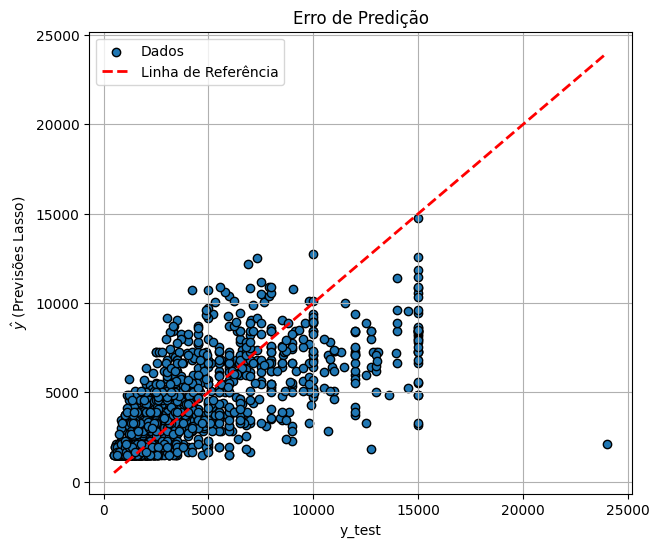

In [ ]:
y_pred_lasso = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lasso, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Lasso)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo Lasso**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1625.362239118911
O erro médio quadrado é : 5591709.187391952
O erro mediano absoluto é : 1063.6411268857646
O R quadrado é : 0.4867195287907983
O erro médio absoluto é : 2364.67951050284


## ***Regressão Ridge***

Instanciando o modelo.

In [ ]:

model = Ridge()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
   'model__alpha': [0.1, 1, 10],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__alpha': 0.1}
Melhor Média do MAE: 1706.3216490355494


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

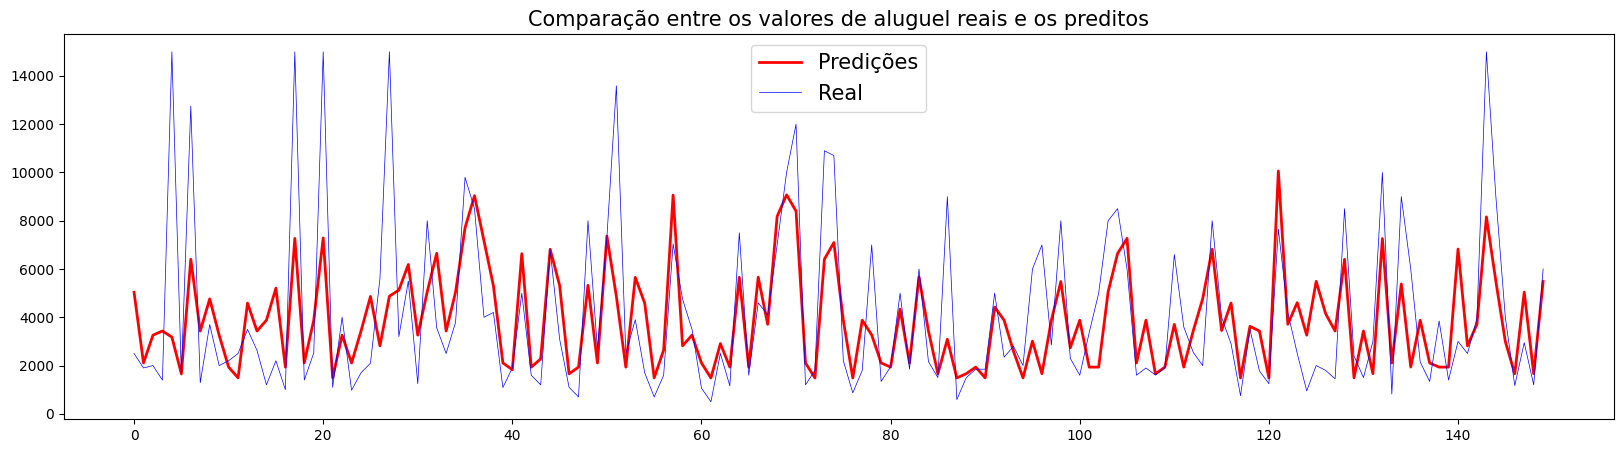

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-49-a44eb6aedff1>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


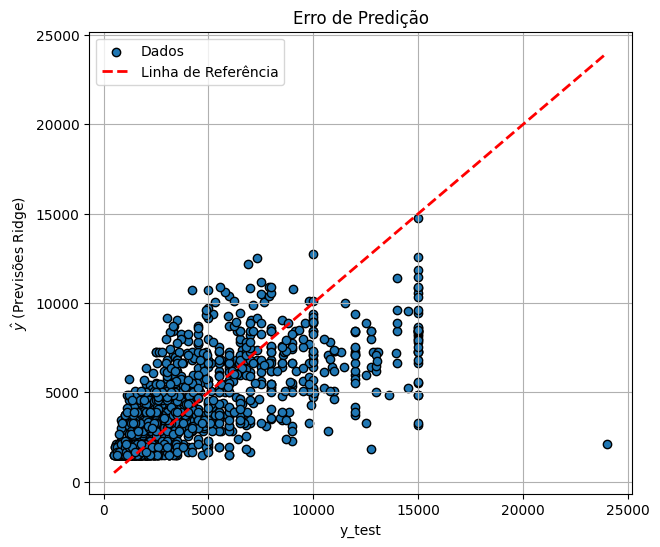

In [ ]:
y_pred_ridge = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_ridge, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo Ridge**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1625.3627484751833
O erro médio quadrado é : 5591708.783080034
O erro mediano absoluto é : 1063.6369970273468
O R quadrado é : 0.48671956590385346
O erro médio absoluto é : 2364.679425013047


## ***Regressão ElasticNet***

Instanciando o modelo.

In [ ]:

model = ElasticNet()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__alpha': [0.1, 1, 10],
    'model__l1_ratio': [0.1, 0.5, 0.9],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__alpha': 0.1, 'model__l1_ratio': 0.9}
Melhor Média do MAE: 1707.0029050996516


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

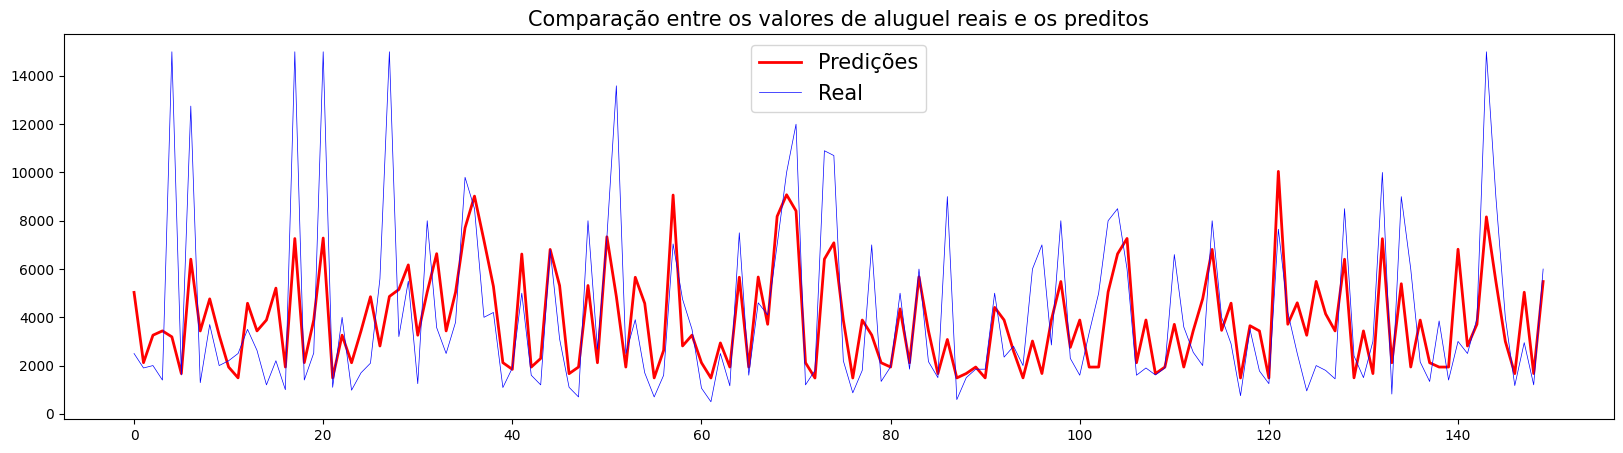

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-54-9d6f62a47efa>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


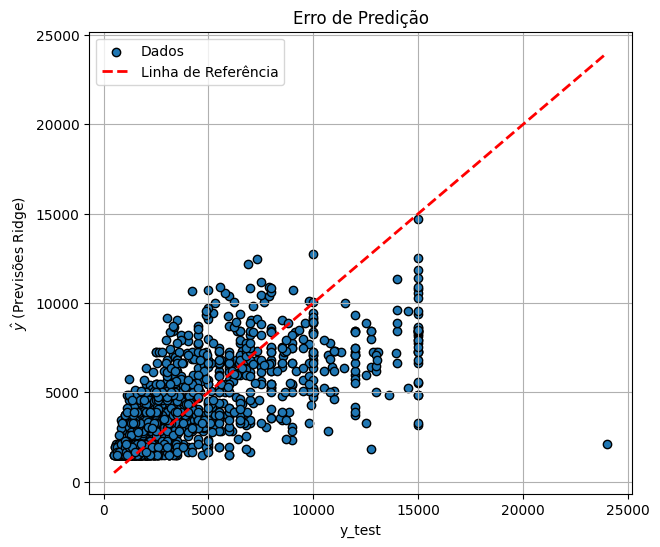

In [ ]:
y_pred_elasticnet = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_elasticnet, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo ElasticNet**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1625.8217903785558
O erro médio quadrado é : 5591490.366794475
O erro mediano absoluto é : 1068.5944609959647
O R quadrado é : 0.48673961501767793
O erro médio absoluto é : 2364.6332414973945


## ***Regressão AdaBoost***

Instanciando o modelo.

In [ ]:

model= AdaBoostRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=2)],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__loss': ['linear', 'square'],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__estimator': DecisionTreeRegressor(max_depth=2), 'model__learning_rate': 0.01, 'model__loss': 'square', 'model__n_estimators': 50}
Melhor Média do MAE: 1672.6404273804314


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

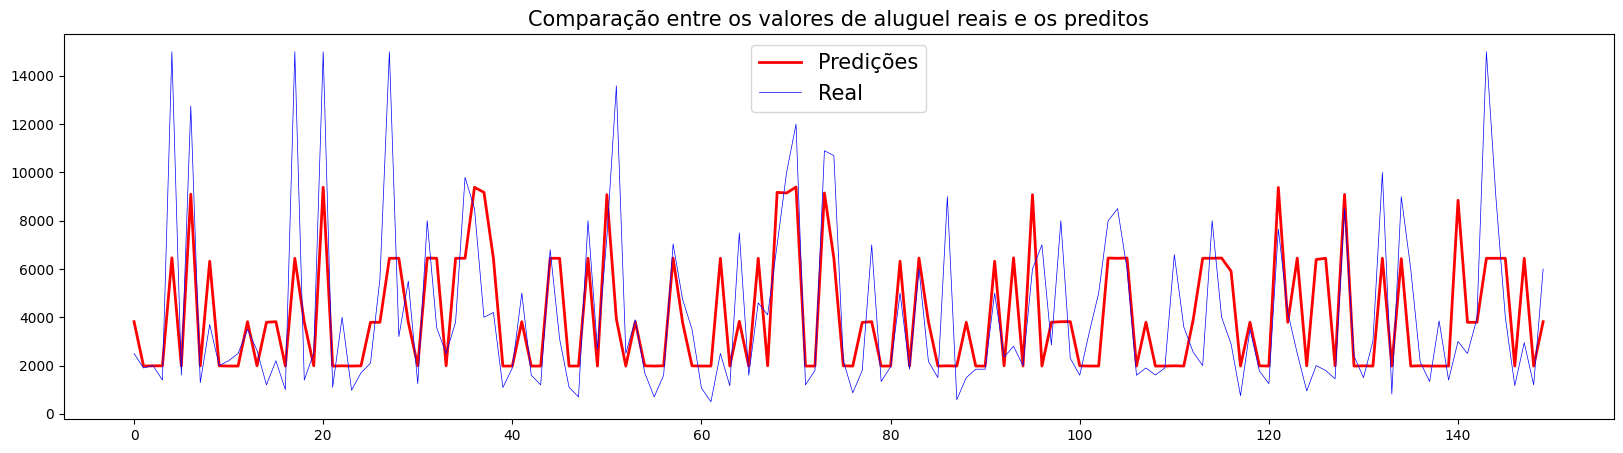

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-59-ec185bf0dbe1>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


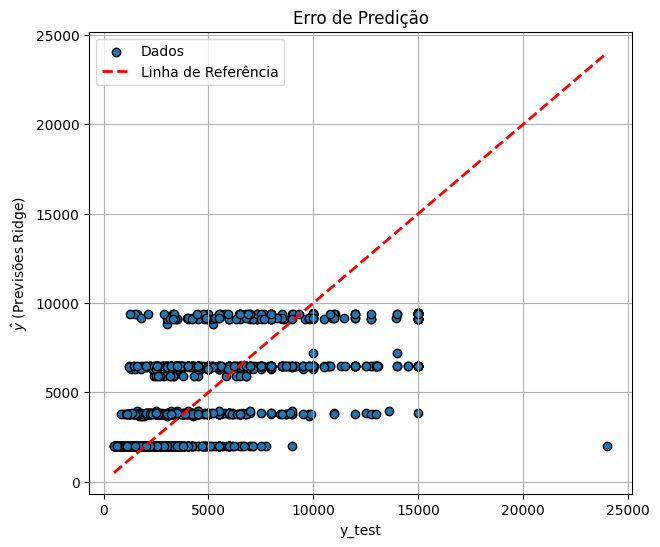

In [ ]:
y_pred_adaboost = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_adaboost, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo AdaBoost**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1655.2818796195902
O erro médio quadrado é : 5811307.258242506
O erro mediano absoluto é : 1040.0962421201905
O R quadrado é : 0.46656193519903
O erro médio absoluto é : 2410.6653144396682


## ***Regressão Gradient Boosting***

Instanciando o modelo.

In [ ]:

model= GradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Melhor Média do MAE: 1549.1883092001297


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

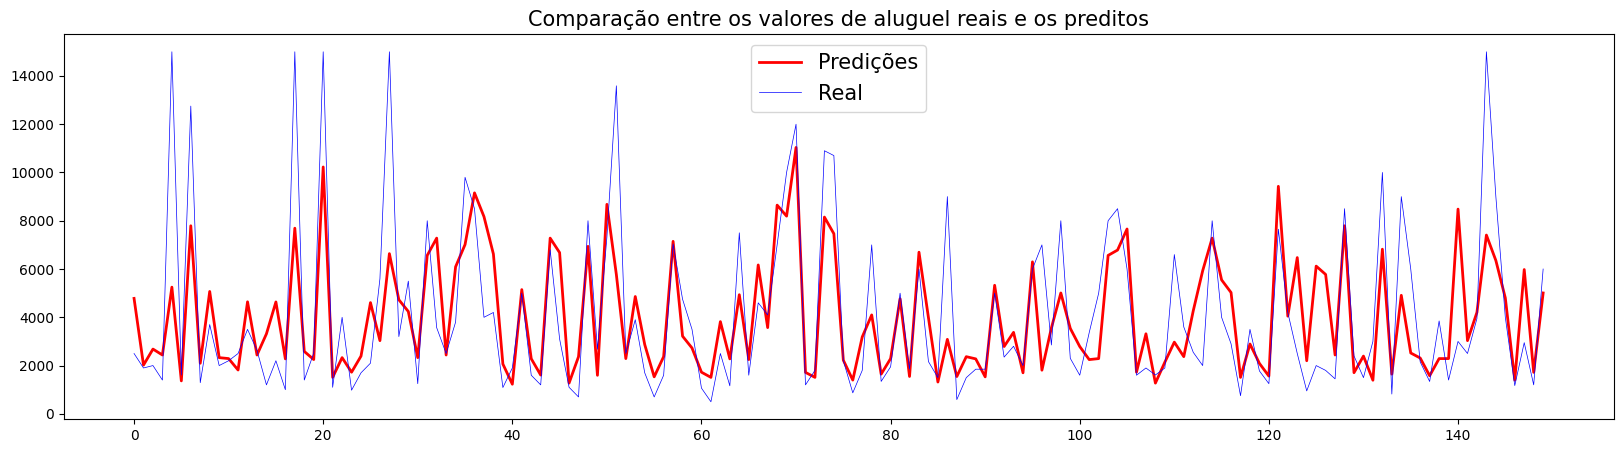

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-64-cbf2a7f047a1>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


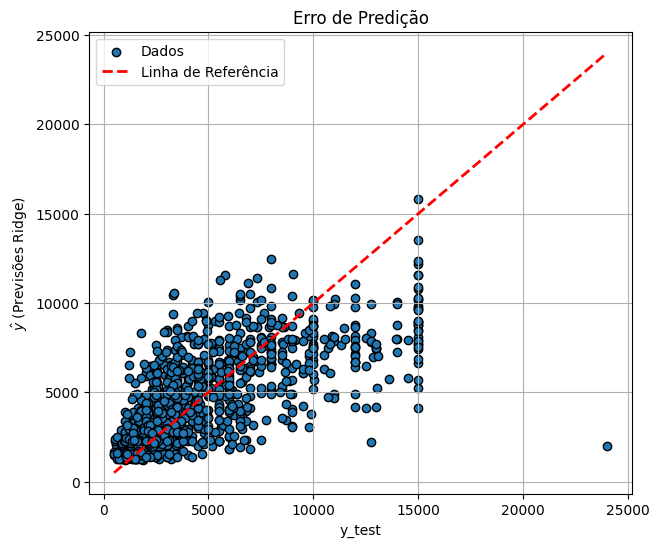

In [ ]:
y_pred_gradientboost = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_gradientboost, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo Gradient Boosting**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1461.532279692712
O erro médio quadrado é : 4861689.452114389
O erro mediano absoluto é : 889.8984013331958
O R quadrado é : 0.5537303230145321
O erro médio absoluto é : 2204.92391073125


Salvando o modelo (melhor resultado)



In [ ]:
import joblib

joblib.dump(model, 'modeloGB-aluguel.pkl')


['modeloGB-aluguel.pkl']

## ***Regressão Stochastic Gradient***

Instanciando o modelo. Iremos padronizar os dados para melhorar a execução do modelo.

In [ ]:

from sklearn.preprocessing import StandardScaler

# Padronizar as features
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)

model = SGDRegressor()

param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__max_iter': [1000, 2000, 5000],
}

my_pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__alpha': 0.01, 'model__max_iter': 5000}
Melhor Média do MAE: 39786.49840529826


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

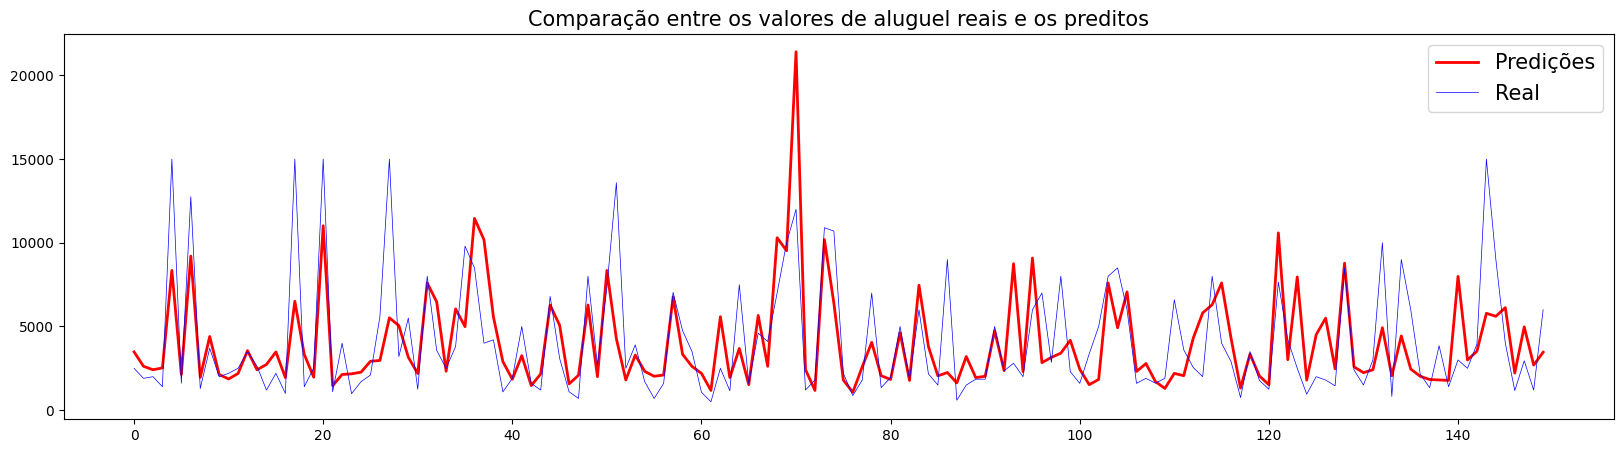

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-69-c608474eb95e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


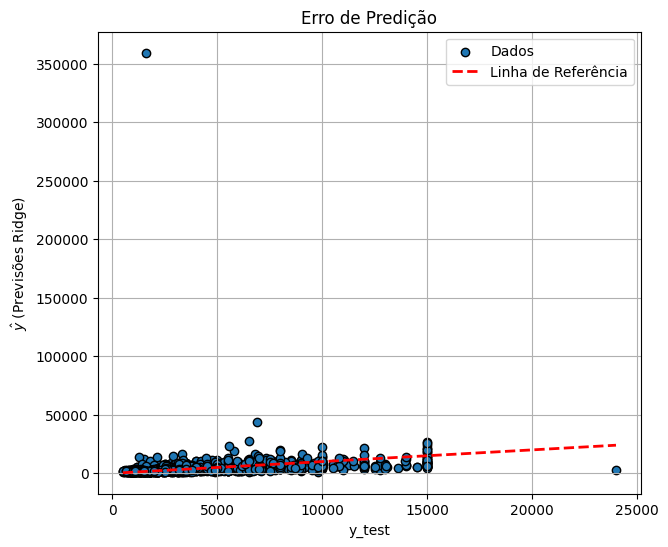

In [ ]:
y_pred_stochastic = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_stochastic, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo Stochastic Gradient**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1957.2116119255836
O erro médio quadrado é : 88057439.8207913
O erro mediano absoluto é : 985.8516899302704
O R quadrado é : -7.08306775084144
O erro médio absoluto é : 9383.892572956667


## ***Regressão XGBoost***

In [ ]:

model= xgb.XGBRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 4],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Melhor Média do MAE: 1546.6687544079598


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

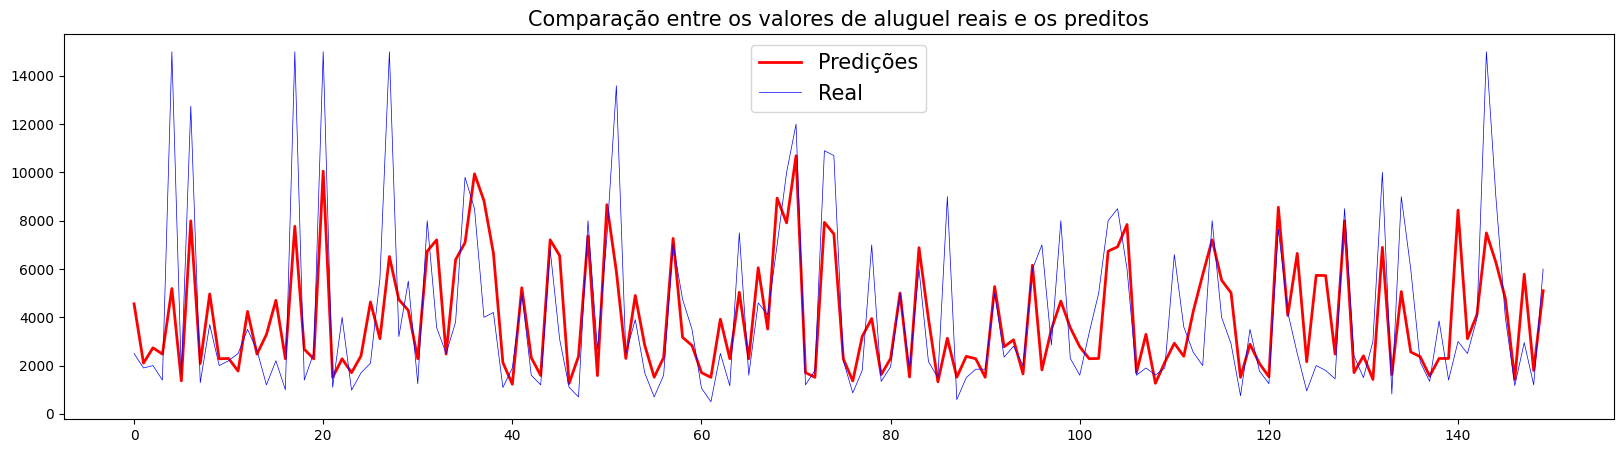

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

<ipython-input-74-a55da84b5076>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


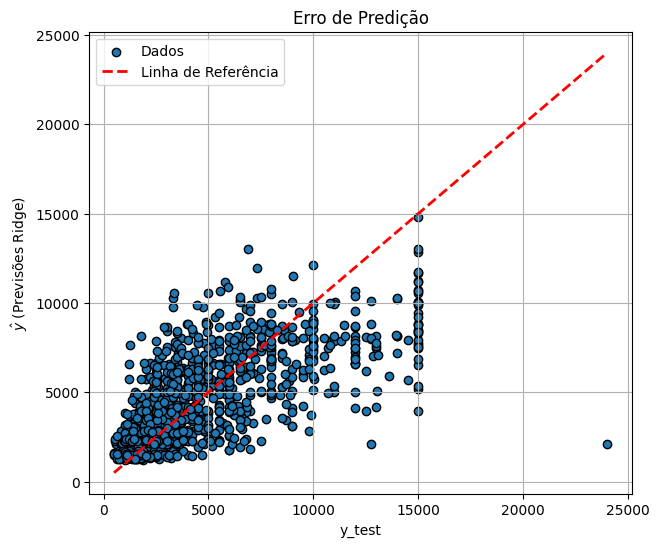

In [ ]:
y_pred_xgboost = best_model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_xgboost, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

#### **Métricas do modelo XGBoost**





In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_test,best_model.predict(x_test)))
print('O erro médio quadrado é :',mean_squared_error(y_test,best_model.predict(x_test)))
print('O erro mediano absoluto é :',median_absolute_error(y_test,best_model.predict(x_test)))
print('O R quadrado é :',r2_score(y_test,best_model.predict(x_test)))
print('O erro médio absoluto é :',rmse(y_test,best_model.predict(x_test)))

O erro médio absoluto é : 1462.3403840861713
O erro médio quadrado é : 4863210.211406772
O erro mediano absoluto é : 886.8915405273438
O R quadrado é : 0.5535907277637723
O erro médio absoluto é : 2205.2687390444667


# ***Regressão com Redes Neurais (Deep Learning)***

Instanciando o modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50
284/284 [==============================] - 2s 3ms/step - loss: 39633976.0000 - mae: 3114.2183 - val_loss: 20252640.0000 - val_mae: 2805.4495
Epoch 2/50
284/284 [==============================] - 1s 2ms/step - loss: 32167806.0000 - mae: 2964.8704 - val_loss: 19630082.0000 - val_mae: 2875.0317
Epoch 3/50
284/284 [==============================] - 1s 2ms/step - loss: 28545188.0000 - mae: 2911.2419 - val_loss: 19391226.0000 - val_mae: 2988.8005
Epoch 4/50
284/284 [==============================] - 1s 2ms/step - loss: 25860416.0000 - mae: 3047.1343 - val_loss: 19369676.0000 - val_mae: 3051.9778
Epoch 5/50
284/284 [==============================] - 1s 2ms/step - loss: 24521990.0000 - mae: 3140.6992 - val_loss: 19328722.0000 - val_mae: 3077.6191
Epoch 6/50
284/284 [==============================] - 1s 2ms/step - loss: 31541056.0000 - mae: 2835.0786 - val_loss: 17571448.0000 - val_mae: 2647.6331
Epoch 7/50
284/284 [==============================] - 1s 2ms/step - loss: 24802390.0000 

In [ ]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Erro médio absoluto: {mae}')

51/51 [==============================] - 0s 2ms/step - loss: 5365241.0000 - mae: 1616.1218
Erro médio absoluto: 1616.121826171875


In [ ]:
y_pred = model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

51/51 [==============================] - 0s 1ms/step


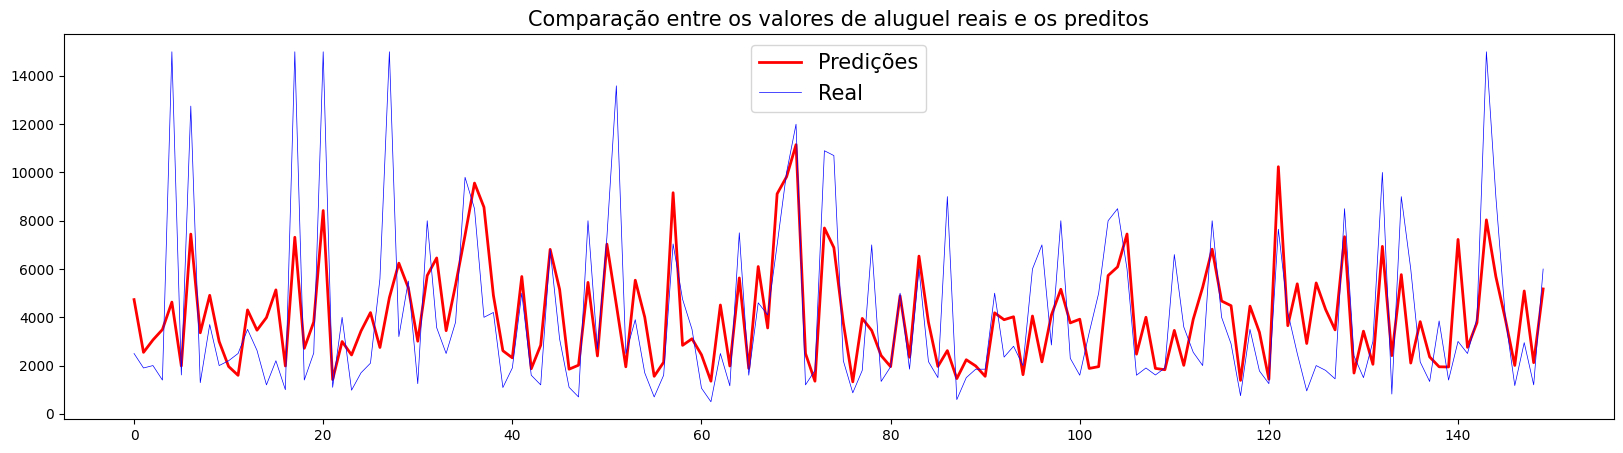

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

51/51 [==============================] - 0s 1ms/step


<ipython-input-80-0051ed629150>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')


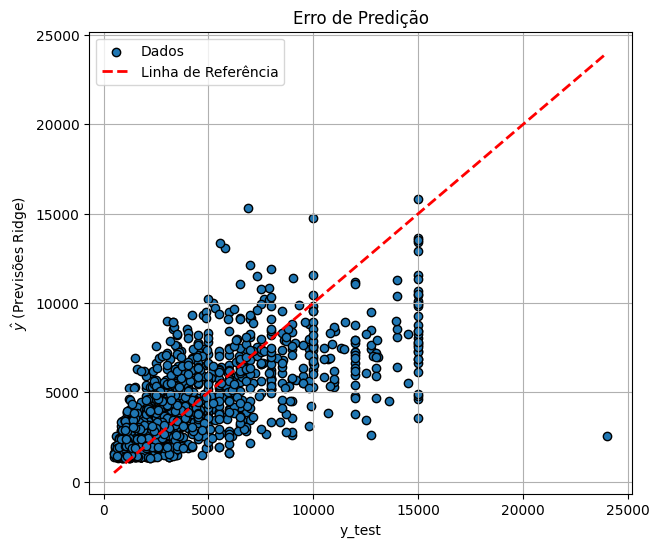

In [ ]:
y_pred_rn = model.predict(x_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rn, label='Dados', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Linha de Referência')
plt.title('Erro de Predição')
plt.xlabel("y_test")
plt.ylabel('$\hat{y}$ (Previsões Ridge)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
x_test

parking spaces  bathroom  rooms  area
1964               2         3      3   134
5267               1         1      2    80
9630               1         2      2    80
5503               1         2      3    90
1683               0         2      4   300
...              ...       ...    ...   ...
6735               4         4      4   285
4803               0         1      2    64
9036               4         4      4   392
23                 0         1      1    35
7942               0         1      2    45

[1604 rows x 4 columns]

### **Métricas das Redes Neurais**

In [ ]:
predictions = model.predict(x_test)

print('O erro médio absoluto é:', mean_absolute_error(y_test, predictions))
print('O erro médio quadrado é:', mean_squared_error(y_test, predictions))
print('O erro mediano absoluto é:', median_absolute_error(y_test, predictions))
print('O R quadrado é:', r2_score(y_test, predictions))

51/51 [==============================] - 0s 2ms/step
O erro médio absoluto é: 1616.1218553956905
O erro médio quadrado é: 5365241.612974717
O erro mediano absoluto é: 1141.978759765625
O R quadrado é: 0.5075076955954277


# ***Conclusões***

A tabela abaixo mostrará o comparativo decrescente dos resultados entre cada modelo.

In [ ]:
resultados = {
    "Regressão Linear": {"MAE": 1618.38 },
    "Regressão Árvore de Decisão": {"MAE": 1528.32},
    "Regressão Suport Vector Machine": {"MAE": 1560.22},
    "Regressão Bagging": {"MAE": 1503.69},
    "Regressão Lasso": {"MAE": 1625.36},
    "Regressão Ridge": {"MAE": 1625.36},
    "Regressão ElasticNet": {"MAE": 1625.82},
    "Regressão AdaBoost": {"MAE": 1639.90},
    "Regressão Gradient Boosting": {"MAE": 1461.57},
    "Regressão Stochastic Gradient": {"MAE": 1660.04},
    "Regressão Gradient Boosting": {"MAE": 1461.57},
    "Regressão XGBoost": {"MAE": 1462.34},
   "Regressão Redes Neurais": {"MAE": 1649.62}
}

df_resultados = pd.DataFrame(resultados)


df_resultados = df_resultados.T

df_resultados = df_resultados.sort_values(by='MAE', ascending=True)

df_resultados

MAE
Regressão Gradient Boosting      1461.57
Regressão XGBoost                1462.34
Regressão Bagging                1503.69
Regressão Árvore de Decisão      1528.32
Regressão Suport Vector Machine  1560.22
Regressão Linear                 1618.38
Regressão Lasso                  1625.36
Regressão Ridge                  1625.36
Regressão ElasticNet             1625.82
Regressão AdaBoost               1639.90
Regressão Redes Neurais          1649.62
Regressão Stochastic Gradient    1660.04

Dessa forma, podemos perceber que o modelo que trouxe o melhor resultado é o **Regressor Gradient Boosting**.

# **ChatBot - Desenvolvendo uma aplicação prática para o nosso modelo.**

Primeiramente, vamos importar o modelo com o melhor resultado, o Gradient Boosting.

In [ ]:
import joblib

model = joblib.load("/content/modeloGB-aluguel.pkl")

In [ ]:
pip install telebot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 4.7 MB/s eta 0:00:00


Esse é o código para o bot regressor.

In [ ]:
import os
import telebot
import pandas as pd
import joblib

model = joblib.load('modeloGB-aluguel.pkl')

secret = 'API_KEY'
bot = telebot.TeleBot(secret)

# Variável de estado para controlar o fluxo da conversa
users_state = {}

def greet(message):
    bot.reply_to(message, 'Olá, como vai? Sou um BOT de predição do preço de aluguel de um imovel com base em algumas características dos imóveis de São Paulo, Rio de Janeiro e Belo Horizonte. \n\nPara começar, por favor, digite /imovel para responder algumas perguntas sobre o imóvel que deseja estimar o preço.')

@bot.message_handler(commands=['imovel'])
def handle_imovel(message):
    if message.from_user.id not in users_state:
        users_state[message.from_user.id] = {'step': 0}

    users_state[message.from_user.id]['step'] = 1
    bot.reply_to(message, "Para estimar o preço do aluguel, por favor, responda às seguintes perguntas separadas por vírgula:\n\n1. Tamanho do imóvel em metros quadrados\nExemplo: 80")
    bot.register_next_step_handler(message, get_area)

def get_area(message):
    try:
        area = float(message.text)
        bot.reply_to(message, "Quantos quartos tem o imóvel?")
        users_state[message.from_user.id]['area'] = area
        users_state[message.from_user.id]['step'] = 2
    except ValueError:
        bot.reply_to(message, "Por favor, insira um valor numérico para o tamanho do imóvel.")
    except Exception as e:
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

def get_rooms(message):
    try:
        rooms = int(message.text)
        bot.reply_to(message, "Quantos banheiros tem o imóvel?")
        users_state[message.from_user.id]['rooms'] = rooms
        users_state[message.from_user.id]['step'] = 3
    except ValueError:
        bot.reply_to(message, "Por favor, insira um valor numérico para o número de quartos.")
    except Exception as e:
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

def get_bathroom(message):
    try:
        bathroom = int(message.text)
        bot.reply_to(message, "Quantas vagas na garagem o imóvel tem?")
        users_state[message.from_user.id]['bathroom'] = bathroom
        users_state[message.from_user.id]['step'] = 4
    except ValueError:
        bot.reply_to(message, "Por favor, insira um valor numérico para o número de banheiros.")
    except Exception as e:
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

def get_parking(message):
    try:
        parking_spaces = int(message.text)
        area = users_state[message.from_user.id]['area']
        rooms = users_state[message.from_user.id]['rooms']
        bathroom = users_state[message.from_user.id]['bathroom']

        df = pd.DataFrame([[parking_spaces, bathroom, rooms, area]], columns=['parking spaces', 'bathroom', 'rooms', 'area'])

        predicted_price = int(model.predict(df)[0])


        response = "Com base nas informações fornecidas:\n\n"
        response += f"Tamanho do imóvel: {area} m²\n"
        response += f"Número de quartos: {rooms}\n"
        response += f"Número de banheiros: {bathroom}\n"
        response += f"Número de vagas na garagem: {parking_spaces}\n"
        response += f"\nO preço estimado do aluguel é: R$ {predicted_price:.2f}"
        bot.reply_to(message, response)


        users_state.pop(message.from_user.id, None)
    except ValueError as e:
        bot.reply_to(message, str(e) + "\n\nPor favor, tente novamente e insira apenas números.")
    except Exception as e:
        print(e)
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

@bot.message_handler(func=lambda message: True)
def handle_message(message):
    if message.text.lower() == '/imovel':
        handle_imovel(message)
    else:
        if message.from_user.id in users_state:
            if users_state[message.from_user.id]['step'] == 0:
                greet(message)
            elif users_state[message.from_user.id]['step'] == 2:
                get_rooms(message)
            elif users_state[message.from_user.id]['step'] == 3:
                get_bathroom(message)
            elif users_state[message.from_user.id]['step'] == 4:
                get_parking(message)
            else:
                bot.reply_to(message, "Por favor, digite /imovel para começar uma nova estimativa.")
        else:
            greet(message)

bot.polling()


1/1 [==============================] - 0s 90ms/step
1
2547
2
80.0
1


<ipython-input-19-1d9b9bb8db71>:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = int(model.predict(df)[0])


1/1 [==============================] - 0s 20ms/step
2
3987
3
100.0
2


<ipython-input-19-1d9b9bb8db71>:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = int(model.predict(df)[0])


# **PARTE 2**

Agora, para a parte 2 do meu projeto, quero criar um **dataset próprio** a partir de **Web Scrapping dos anúncios de imóveis do site QuintoAndar**. Pretendo criar um dataset com os imóveis dos bairros da Zona Sul, Zona Norte e Zona Oeste do Rio de Janeiro.




Para isso, é preciso algumas configurações e bibliotécas próprias como a BeautifulSoup.

In [ ]:
from bs4 import BeautifulSoup
import requests

Usei esse script para criar o csv com a informação de vários bairros diferentes.


In [ ]:
URL = 'https://www.quintoandar.com.br/alugar/imovel/zumbi-rio-de-janeiro-rj-brasil?referrer=home&profiling=true'

page = requests.get(URL)

soup = BeautifulSoup(page.text, 'html.parser')

house_cards = soup.find_all('div', {'data-testid': 'house-card-container-rent'})

In [ ]:

    area = []
    price = []
    rooms = []
    parking_spaces = []
    neighborhood = []

    for card in house_cards:
      title = card.find('a', class_='sc-1d0oyoa-0 bfDoiv')['title']



      price_total_element = card.find('h3', class_='sc-iBkjds ejhMRY sc-ftvSup etNEqI CozyTypography').text.strip()
      price_total_element = int(''.join(filter(str.isdigit, price_total_element)))


      infos_element = card.find('div', class_='sc-iLIByi kDumBk Cozy__CardContent-Container').text.strip()
      infos_element  = infos_element.split(" · ")


      title_parts = title.split(',')

      for part in title_parts:
        if "Zumbi" in part.strip():
          if price_total_element not in price:
            num_area = ''.join(filter(str.isdigit, infos_element[0]))
            num_area = num_area.replace('²', '')
            if num_area:
              area.append(num_area)

            num_room = ''.join(filter(str.isdigit, infos_element[1]))
            if num_room:
              rooms.append(num_room)

            if len(infos_element) < 4:
              num_parking = 0
            else:
              num_parking = ''.join(filter(str.isdigit, infos_element[1]))

            parking_spaces.append(num_parking)

            price.append(price_total_element)
            neighborhood.append("Zumbi")


In [ ]:
import csv

def create_csv(area, rooms, parking_spaces, neighborhood, price, name):

  headers = ["Area", "Rooms", "Parking Spaces", "Neighborhood", "Price"]

  data = list(zip(area, rooms, parking_spaces, neighborhood, price))
  print(data)

  csv_file = name


  with open(csv_file, mode='w', newline='') as file:
      writer = csv.writer(file)


      writer.writerow(headers)


      for row in data:
          writer.writerow(row)

  print("Data has been written to", csv_file)

In [ ]:
filename = "casas_zumbi.csv"

drive_path = "/content/drive/MyDrive/dataset_casas"

In [ ]:
create_csv(area, rooms, parking_spaces, neighborhood, price, filename)

[('70', '2', 0, 'Zumbi', 1974), ('78', '2', '2', 'Zumbi', 2258), ('400', '3', 0, 'Zumbi', 6256)]
Data has been written to casas_zumbi.csv


In [ ]:
from shutil import move
import os

csv_file_path = filename
drive_file_path = os.path.join(drive_path, filename)

move(csv_file_path, drive_file_path)

'/content/drive/MyDrive/dataset_casas/casas_vilavalqueire.csv'

Agora, vou juntar todos os csvs de cada bairro em um csv só, formando, assim, meu dataset.

In [ ]:
import os
import pandas as pd
from shutil import move
from joblib import dump

In [ ]:
file_path = '/content/drive/MyDrive/dataset_casas'


new_csv = pd.DataFrame()


for file in os.listdir(file_path):
  if file.endswith('csv'):
    df = pd.read_csv(os.path.join(file_path,file))
    new_csv = new_csv.append(df)

filename = 'imoveis_dataset.csv'

new_csv.to_csv(filename)


<ipython-input-5-a5e540f6a32d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_csv = new_csv.append(df)
<ipython-input-5-a5e540f6a32d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_csv = new_csv.append(df)
<ipython-input-5-a5e540f6a32d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_csv = new_csv.append(df)
<ipython-input-5-a5e540f6a32d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_csv = new_csv.append(df)
<ipython-input-5-a5e540f6a32d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_csv = new_csv.append(df)
<ipyt

In [ ]:
drive_file_path = os.path.join(file_path, filename)

move(filename, drive_file_path)

'/content/drive/MyDrive/dataset_casas/imoveis_dataset.csv'

Agora vamos dar uma breve olhada no nosso novo dataset com os bairros do Rio de Janeiro.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_casas/imoveis_dataset.csv', encoding = 'unicode_escape')

dataset = dataset.sample(frac=1)

dataset = dataset.drop(dataset.columns[[0]], axis=1)

dataset.head()

Area  Rooms  Parking Spaces      Neighborhood  Price
609    78      3               3            Tijuca   3324
103    62      2               2          Campinho   1512
581    80      3               0  Sýýo Cristýývýýo   1870
105    77      2               2          Campinho   1438
550   260      5               5           Recreio   8250

Primeiramente, vamos fazer uma matriz de correlação entre as features

<ipython-input-102-25f6140f1b01>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dataset.corr()


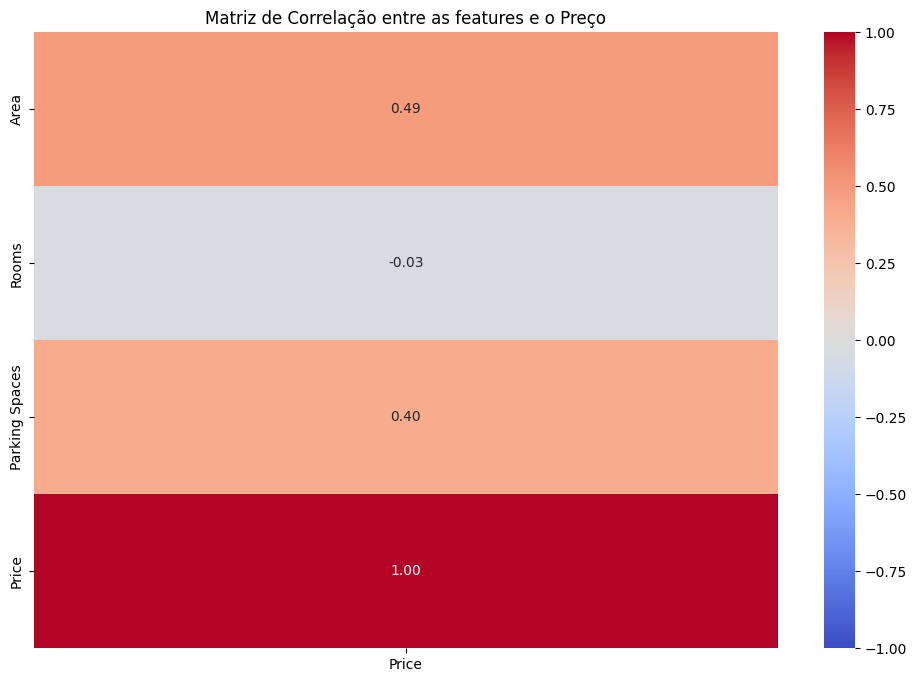

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacao = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao.filter(like='Price'), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre as features e o Preço')
plt.show()


Irei padronizar os dados e substituir os dados categóricos para numéricos.

In [ ]:
dataset.shape

(687, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['Area', 'Rooms', 'Parking Spaces']
categorical_features = ['Neighborhood']

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)


dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

encoded_neighborhood = encoder.fit_transform(dataset[categorical_features])


dataset = pd.concat([dataset.drop(categorical_features, axis=1), pd.DataFrame(encoded_neighborhood)], axis=1)

prices = dataset['Price']
del dataset['Price']
dataset['Price'] = prices

dump(encoder, '/content/drive/MyDrive/dataset_casas/encoder.joblib')
dump(scaler, '/content/drive/MyDrive/dataset_casas/scaler.joblib')

dataset.head(15)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Area     Rooms  Parking Spaces    0    1    2    3    4    5    6  \
609 -0.011764 -0.043794        1.384976  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
103 -0.193131 -0.053378        0.605076  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
581  0.010906 -0.043794       -0.954726  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
105 -0.023100 -0.053378        0.605076  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
550  2.051277 -0.024624        2.944778  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
607  0.078919 -0.043794        1.384976  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
367  1.484507 -0.043794        1.384976  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
577 -0.351826 -0.062963       -0.174825  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
622  0.044913 -0.043794        1.384976  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
562  0.577676 -0.034209       -0.954726  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
342  0.010906 -0.053378       -0.954726  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
662 -0.079777 -0.053378        0.605076  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
285  0.146931 -0.053378        0.605076  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
353  0.464322 -0.043794        1.384976  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
436 -0.329155 -0.053378        0.605076  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     ...   56   57   58   59   60   61   62   63   64  Price  
609  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3324  
103  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1512  
581  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1870  
105  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1438  
550  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   8250  
607  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3452  
367  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  12180  
577  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   2930  
622  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   2737  
562  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4067  
342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1252  
662  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3732  
285  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   9697  
353  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4695  
436  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1455  

[15 rows x 69 columns]

Finalmente, podemos começar a testar as nossas pipelines de algorítmos de regressão para buscar o melhor modelo de predição.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

Vamos separar o dataset em 85% treino e 15% teste

In [ ]:
features = list(dataset.columns)
target = 'Price'
features.remove(target)


X = dataset[features]
X.columns = X.columns.astype(str)
y = dataset[target]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(583, 68) (104, 68) (583,) (104,)


## **Aplicando modelos de Machine Learning/Deep Learning  COM O NOVO DATASET**

### Para facilitar nosssos trabalhos, irei fazer testes de predição apenas com os algoritmos que empenharam melhor na parte 1 do projeto, que são, respectivamente a ***Regressão Gradient Boosting, Regressão XGBoost, Regressão Bagging e Regressão Árvore de Decisão***.


Em todos os modelos, assim como na primeira parte, iremos praticar o método de Grid-Search para encontrar os melhores hiperparametros do modelo. O método de Cross Validation também será utilizado.

Será feito Pipelines de forma a deixar o código mais simplificado.

## ***Regressão Gradient Boosting***

Instanciando o modelo

In [ ]:

model= GradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
Melhor Média do MAE: 1691.3339273046815


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

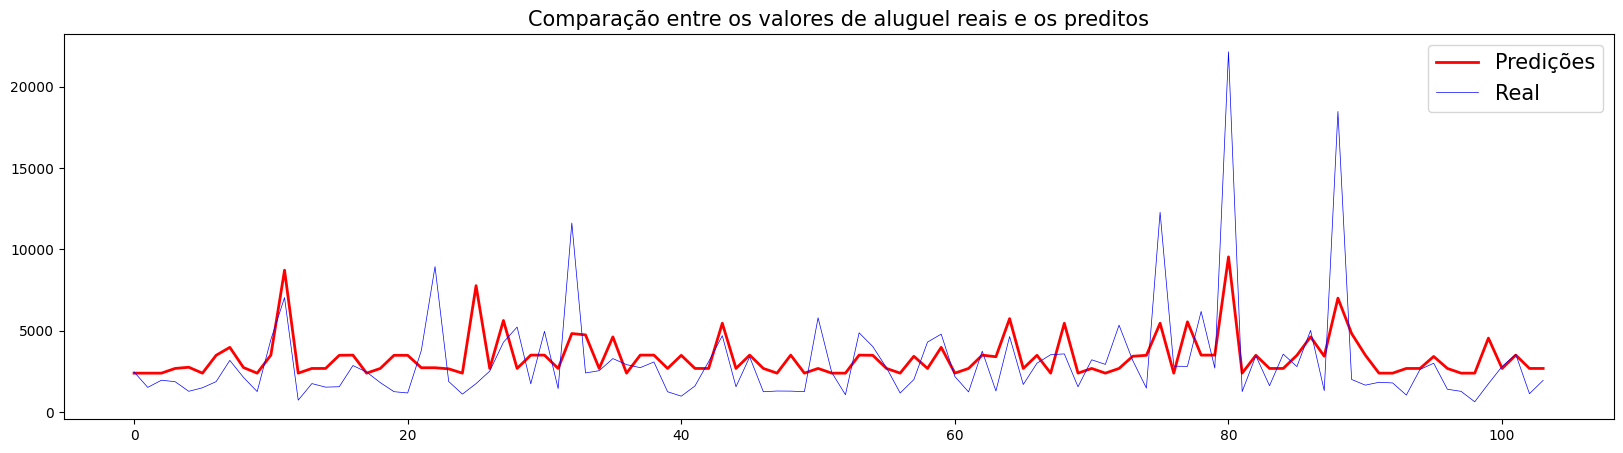

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

## ***Regressão XGBoost***

Instanciando o modelo

In [ ]:

model= xgb.XGBRegressor(enable_categorical=True)

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 4],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 50, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Melhor Média do MAE: 1677.417987206254


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

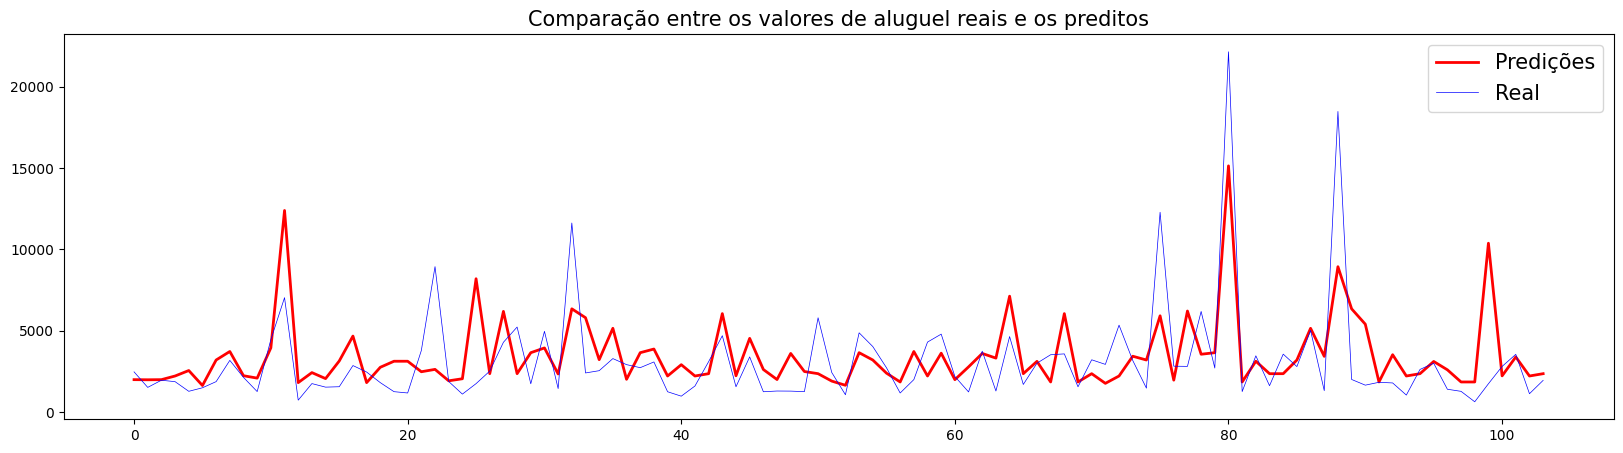

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

## ***Regressão Bagging***

Instanciando o modelo

In [ ]:

model = BaggingRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__max_samples': [0.5, 0.7, 0.9],
    'model__max_features': [0.5, 0.7, 0.9],
}
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__max_features': 0.9, 'model__max_samples': 0.5, 'model__n_estimators': 100}
Melhor Média do MAE: 1607.425404102541


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

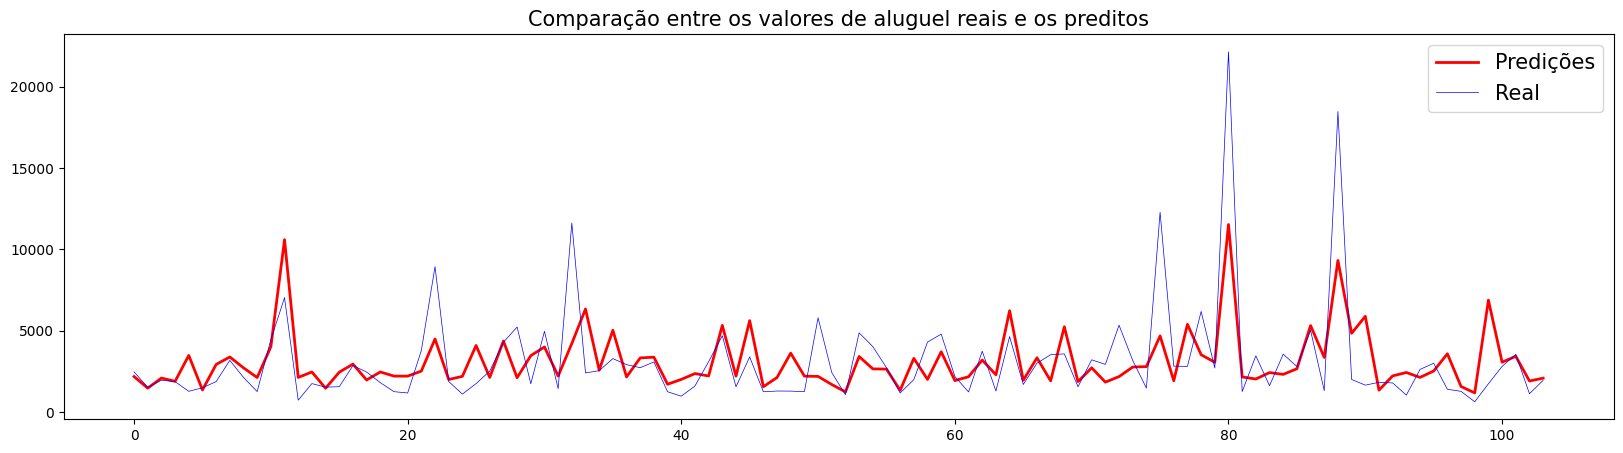

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

### ***Regressão Árvore de Decisão***

Instanciando o modelo

In [ ]:

model = DecisionTreeRegressor()

my_pipeline = Pipeline(steps=[('model', model)])

param_grid = {
  'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': [1.0, 'sqrt'],
    'model__criterion': ['squared_error', 'absolute_error']
}


grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Melhores Hiperparâmetros:", grid_search.best_params_)

print("Melhor Média do MAE:", -grid_search.best_score_)


Melhores Hiperparâmetros: {'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Melhor Média do MAE: 1653.370557029178


In [ ]:
y_pred = best_model.predict(x_test)

predict_list = y_pred.tolist()
real_list = y_test.tolist()

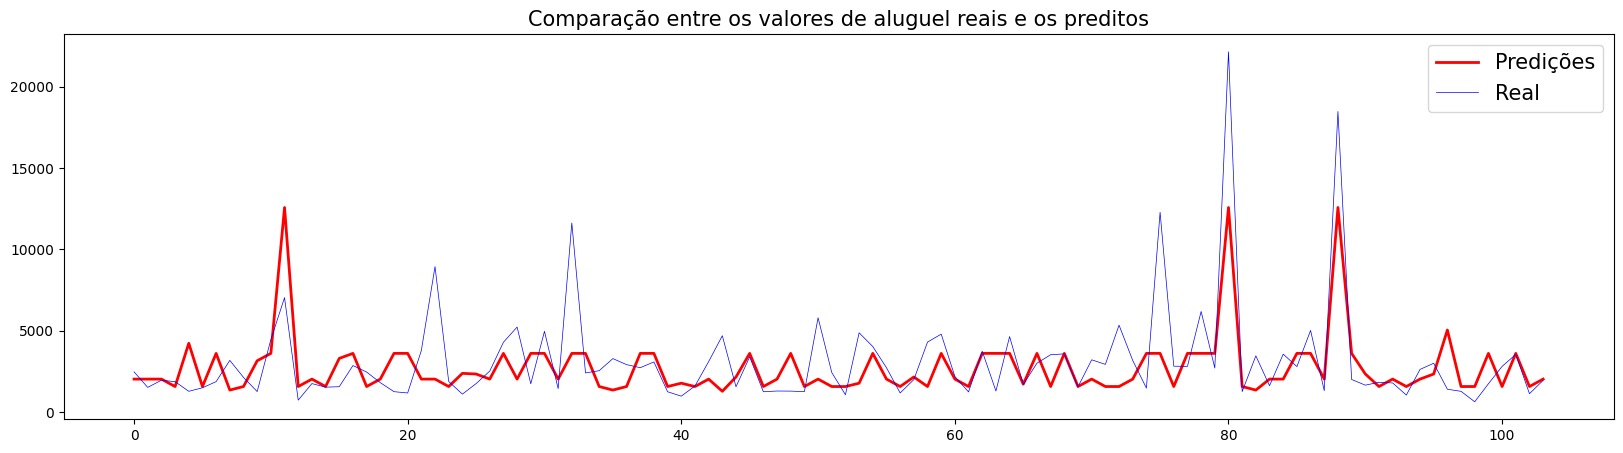

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predict_list[:150], linewidth=2, color='r')
plt.plot(real_list[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de aluguel reais e os preditos',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

Resultado

In [ ]:
resultados = {
    "Regressão Árvore de Decisão": {"MAE": 1653.37},
    "Regressão Bagging": {"MAE": 1607.41 },
    "Regressão Gradient Boosting": {"MAE": 1691.33},
    "Regressão XGBoost": {"MAE": 1677.41},
}

df_resultados = pd.DataFrame(resultados)


df_resultados = df_resultados.T

df_resultados = df_resultados.sort_values(by='MAE', ascending=True)

df_resultados

MAE
Regressão Bagging            1607.41
Regressão Árvore de Decisão  1653.37
Regressão XGBoost            1677.41
Regressão Gradient Boosting  1691.33

Dessa forma, o modelo que empenhou melhor foi o do algoritmo de Regressão Bagging. Dessa maneira, iremos criar o modelo e configurar no nosso bot do Telegram.

In [ ]:
import joblib
from joblib import load


joblib.dump(best_model, "/content/drive/MyDrive/dataset_casas/modelo_bagging.joblib")


['/content/drive/MyDrive/dataset_casas/modelo_bagging.joblib']

In [ ]:

replacements = {
      'á': 'ýý', 'ã': 'ýý', 'à':'ýý', 'â': 'ýý', 'é': 'ýý', 'ê': 'ýý', 'í': 'ýý',
      'ó': 'ýý', 'õ': 'ýý', 'ô': 'ýý', 'ú': 'ýý', 'ç': 'ýý'
}



def replace_word(palavra):
  new_palavra = ''
  for char in palavra:
    new_palavra += replacements.get(char, char)
  return new_palavra



neighborhoods = ['Abolicao', 'Andarai', 'Anil', 'Barra da Tijuca', 'Benfica',
       'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Bras de Pina',
       'Cachambi', 'Campinho', 'Campo Grande', 'Cascadura', 'Catete',
       'Centro', 'Cidade Nova', 'Copacabana', 'Cordovil', 'Curicica',
       'Del Castilho', 'Engenho de Dentro', 'Estýýcio', 'Flamengo',
       'Freguesia', 'Glýýria', 'Grajaýý', 'Guaratiba', 'Gýývea',
       'Humaitýý', 'Ipanema', 'Irajýý', 'Itanhangýý', 'Jacarepaguýý',
       'Jardim Botýýnico', 'Jardim Carioca', 'Jardim Guanabara', 'Lagoa',
       'Laranjeiras', 'Leblon', 'Madureira', 'Marechal Hermes', 'Mýýier',
       'Olaria', 'Oswaldo Cruz', 'Parada de Lucas', 'Pechincha', 'Penha',
       'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa',
       'Quintino Bocaiýýva', 'Ramos', 'Recreio', 'Rio Comprido',
       'Santa Teresa', 'Sýýo Cristýývýýo', 'Taquara', 'Tijuca',
       'Todos os Santos', 'Urca', 'Vargem Grande', 'Vargem Pequena',
       'Vila Isabel', 'Vila Valqueire']




encoded_feature = encoder.transform([[replace_word('Copacabana')]])

scaled_feature = scaler.transform([[50, 2, 1]])


new_data_ = np.concatenate((scaled_feature, encoded_feature), axis=1)

new_data = pd.DataFrame(new_data_)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
loaded_model = joblib.load("/content/drive/MyDrive/dataset_casas/modelo_bagging.joblib")

pred = loaded_model.predict(new_data)

print(pred)


[3618.0827619]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


Agora segue o nosso código do novo bot do telegram atualizado!

In [ ]:
pip install telebot

In [ ]:
import os
import telebot
import pandas as pd
import joblib
from joblib import load
import numpy as np


model = joblib.load('/content/drive/MyDrive/dataset_casas/modelo_bagging.joblib')

secret = 'API_KEY'
bot = telebot.TeleBot(secret)

# Variável de estado para controlar o fluxo da conversa
users_state = {}
neighborhoods = ['Abolicao', 'Andarai', 'Anil', 'Barra da Tijuca', 'Benfica',
       'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Bras de Pina',
       'Cachambi', 'Campinho', 'Campo Grande', 'Cascadura', 'Catete',
       'Centro', 'Cidade Nova', 'Copacabana', 'Cordovil', 'Curicica',
       'Del Castilho', 'Engenho de Dentro', 'Estácio', 'Flamengo',
       'Freguesia', 'Glória', 'Grajaú', 'Guaratiba', 'Gávea',
       'Humaitá', 'Ipanema', 'Irajá', 'Itanhangá', 'Jacarepaguá',
       'Jardim Botânico', 'Jardim Carioca', 'Jardim Guanabara', 'Lagoa',
       'Laranjeiras', 'Leblon', 'Madureira', 'Marechal Hermes', 'Méier',
       'Olaria', 'Oswaldo Cruz', 'Parada de Lucas', 'Pechincha', 'Penha',
       'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa',
       'Quintino Bocaiúva', 'Ramos', 'Recreio', 'Rio Comprido',
       'Santa Teresa', 'São Cristóvão', 'Taquara', 'Tijuca',
       'Todos os Santos', 'Urca', 'Vargem Grande', 'Vargem Pequena',
       'Vila Isabel', 'Vila Valqueire']

replacements = {
      'á': 'ýý', 'ã': 'ýý', 'à':'ýý', 'â': 'ýý', 'é': 'ýý', 'ê': 'ýý', 'í': 'ýý',
      'ó': 'ýý', 'õ': 'ýý', 'ô': 'ýý', 'ú': 'ýý', 'ç': 'ýý'
}


def replace_word(palavra):
  new_palavra = ''
  for char in palavra:
    new_palavra += replacements.get(char, char)
  return new_palavra

encoder = load('/content/drive/MyDrive/dataset_casas/encoder.joblib')
scaler = load('/content/drive/MyDrive/dataset_casas/scaler.joblib')


def greet(message):
    bot.reply_to(message, 'Olá, como vai? Sou um BOT de predição do preço de aluguel de um imovel com base em algumas características dos imóveis do Rio de Janeiro adquirido no site do Quinto Andar. \n\nPara começar, por favor, digite /imovel para responder algumas perguntas sobre o imóvel que deseja estimar o preço.')

@bot.message_handler(commands=['imovel'])
def handle_imovel(message):
    # Verificando se o usuário já está em uma conversa
    if message.from_user.id not in users_state:
        users_state[message.from_user.id] = {'step': 0}

    # Definindo o passo da conversa
    users_state[message.from_user.id]['step'] = 1

    # Pergunta sobre o bairro
    bairro = bot.send_message(message.chat.id,
                         "Em qual bairro você deseja saber o preço do aluguel? \n\n**Lista de Bairros:**\n\n"
                         + ", ".join(neighborhoods)
                        )
    bot.register_next_step_handler(message, get_neighborhood)


def get_neighborhood(message):
    # Validando se o bairro está na lista
    if message.text not in neighborhoods:
        bot.reply_to(message, f"O bairro '{message.text}' não está na lista. Por favor, escolha um bairro da lista.")
        return
    neighborhood = str(message.text)
    users_state[message.from_user.id]['neighborhood'] = neighborhood
    users_state[message.from_user.id]['step'] = 2
    bot.reply_to(message, "Tamanho do imóvel em metros quadrados\nExemplo: 80")

def get_area(message):
    try:
        area = float(message.text)
        bot.reply_to(message, "Quantos quartos tem o imóvel?")
        users_state[message.from_user.id]['area'] = area
        users_state[message.from_user.id]['step'] = 3
    except ValueError:
        bot.reply_to(message, "Por favor, insira um valor numérico para o tamanho do imóvel.")
    except Exception as e:
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

def get_rooms(message):
    try:
        rooms = int(message.text)
        bot.reply_to(message, "Quantos espaços disponíveis para vaga de veículo? Se não tiver nenhum digite 0.")
        users_state[message.from_user.id]['rooms'] = rooms
        users_state[message.from_user.id]['step'] = 4
    except ValueError:
        bot.reply_to(message, "Por favor, insira um valor numérico para o número de quartos.")
    except Exception as e:
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

def get_parking(message):
    try:
        parking_spaces = int(message.text)
        neighborhood = users_state[message.from_user.id]['neighborhood']
        area = users_state[message.from_user.id]['area']
        rooms = users_state[message.from_user.id]['rooms']

        neighborhood_ =  replace_word(neighborhood)

        scaled_features = scaler.transform([[area, rooms, parking_spaces]])
        encoded_feature = encoder.transform([[neighborhood_]])

        df_ = np.concatenate((scaled_features, encoded_feature), axis=1)
        df = pd.DataFrame(df_)
        print(df)
        predicted_price = int(model.predict(df)[0])


        response = "Com base nas informações fornecidas:\n\n"
        response += f"Bairro do imóvel: {neighborhood}\n"
        response += f"Tamanho do imóvel: {area} m²\n"
        response += f"Número de quartos: {rooms}\n"
        response += f"Número de vagas na garagem: {parking_spaces}\n"
        response += f"\nO preço estimado do aluguel é: R$ {predicted_price:.2f}"
        bot.reply_to(message, response)


        users_state.pop(message.from_user.id, None)
    except ValueError as e:
        bot.reply_to(message, str(e) + "\n\nPor favor, tente novamente e insira apenas números.")
    except Exception as e:
        print(e)
        bot.reply_to(message, "Ocorreu um erro ao processar sua solicitação. Por favor, tente novamente.")

@bot.message_handler(func=lambda message: True)
def handle_message(message):
    if message.text.lower() == '/imovel':
        handle_imovel(message)
    else:
        if message.from_user.id in users_state:
            if users_state[message.from_user.id]['step'] == 0:
                greet(message)
            elif users_state[message.from_user.id]['step'] == 2:
                get_area(message)
            elif users_state[message.from_user.id]['step'] == 3:
                get_rooms(message)
            elif users_state[message.from_user.id]['step'] == 4:
                get_parking(message)
            else:
                bot.reply_to(message, "Por favor, digite /imovel para começar uma nova estimativa.")
        else:
            greet(message)

bot.polling()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


         0         1         2    3    4    5    6    7    8    9   ...   58  \
0 -0.329155 -0.053378 -0.954726  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

    59   60   61   62   63   64   65   66   67  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 68 columns]
